<a href="https://colab.research.google.com/github/shushkova/pash/blob/master/HW_Varvara_Shushkova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem 1**

A simple averaging filter is defined as  
$$y[n] = (x[n – 1] + ... + x[n-N]) / N$$ 
a) Let $N = 7$. Determine the transfer function, its zeros and poles  
  
b) Determine a general form for zeros and poles for any $N$  
  
  
c) By comparing $y[n]$ and $y[n – 1]$ determine a recursive implementation

**Solution**


**A.**  $$y[n] = (x[n – 1] + ... + x[n-N]) / N \\
Y[z] = (X(z)z^{-1} + ... + X(z)z^{-N}) \frac{1}{N} = X(z)(z^{-1} + ... + z^{-N}) \\
H(z) = (z^{-1} + ... + z^{-N}), \ N = 7\ => H(z) = \frac{z^{-1} + ... + z^{-7}}{7} $$

**B.** $$
y[n-1] = (x[n-2] + ... + x[n-1 - N]) / N \\
Y(z)z^{-1} = (X(z)z^{-2} + ... + X(z)z^{-N-1}) N\\ => 
Y[z] = (X(z)z^{-1} + ... + X(z)z^{-N}) \frac{1}{N} \\ => 
Y(z)(1 - z^{-1}) = X(z)(z^{-1} - z^{-N-1})/N =>\\ 
H(z) = \frac{z^{-1} - z^{-N-1}}{N(1 - z^{-1})} = \frac{z^{-N-1}(z^N - 1)}{N(z^{-1}(z-1))} = \frac{z^{-N}(z^N - 1)}{N(z-1)} $$


**Answer:** $$
zeros: \sqrt[n]{1}, \ 0 \\
poles: 1 (\sqrt[1]{1}), \ 0 $$

**C.** 
From the previous step: 
$$H(z) =  \frac{z^{-N}(z^N - 1)}{N(z-1)}$$

#**Problem 2**
A Digital Filter is defined by the difference equation
$$y[n]=0.5y[n-1]+0.5x[n]$$
The filter is clearly recursive. Determine the impulse response $h[n]$  
a) Is the filter stable?  
b) Is it Low Pass, Band Pass or High Pass ?

Plot impulse response and magnitude and phase response in Matlab. Provide Matlab code.

**Solution**
$$y(n) = \sum_{i=0}^pb_ix(n-i) - \sum_{k=1}^Qa_ky(n-k) \\ 
h(n) = \sum_{i=0}^pb_i\delta(n-i) - \sum_{k=1}^qa_kh(n-k) \\ => 
h(n) = 0.5 \delta(n) + 0.5h(n-1)$$

**A.**

$$h[0] = 0.5 * 1 + 0 = 0.5 \\
  h[1] = 0.5 * 0 + 0.5 * 0.5 = 0.5^2 \\
  h[n] = 0.5^{n+1} \\
  with\ n->\inf:\ h[n] ->0 => the\ filter\ is\ stable$$
**B.**
$$
H(j \omega) = \frac{b}{1 - a_1(e^{j\omega})^{-1}} = \frac{0.5}{1 - 0.5e^{-j \omega}} \\=>  low\ pass\ filter
$$

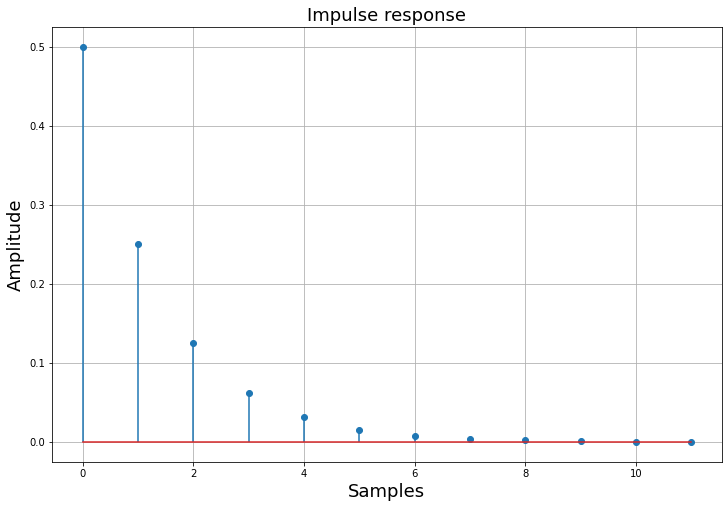

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

b = np.array([0.5, 0])
a = np.array([1, -0.5])

system = signal.dlti(b, a)
t, y = signal.dimpulse(system)
n = 12

plt.figure(figsize=(12, 8))
plt.stem(t[:n], y[0][:n], use_line_collection=True)
plt.title('Impulse response', fontsize=18)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.grid()

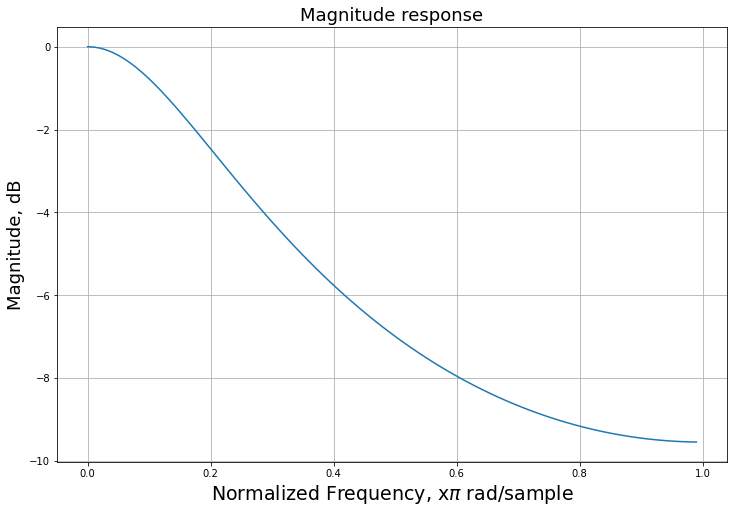

In [ ]:
from math import pi

w, m, p = signal.dbode(system)
plt.figure(figsize=(12, 8))
plt.plot(w/pi, m)
plt.title('Magnitude response', fontsize=18)
plt.ylabel('Magnitude, dB',fontsize=18)
plt.xlabel('Normalized Frequency, x$\pi$ rad/sample',fontsize=19)
plt.grid()

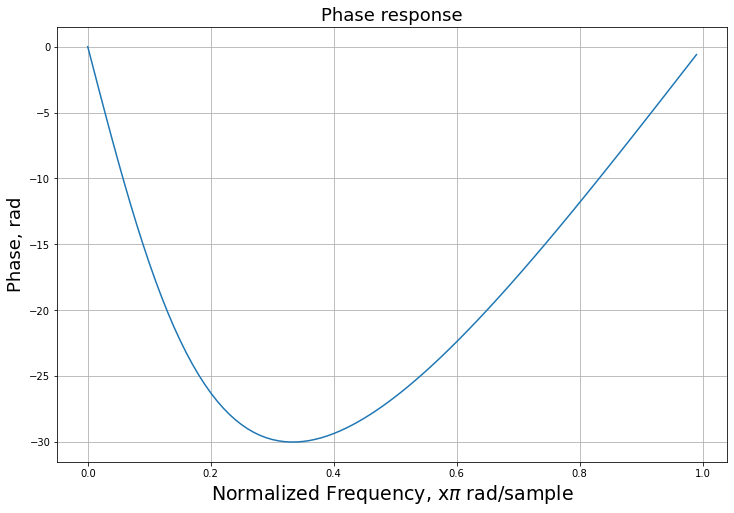

In [ ]:
from math import pi

w, m, p = signal.dbode(system)
plt.figure(figsize=(12, 8))
plt.plot(w/pi, p)
plt.title('Phase response', fontsize=18)
plt.ylabel('Phase, rad',fontsize=18)
plt.xlabel('Normalized Frequency, x$\pi$ rad/sample',fontsize=19)
plt.grid()

#**Problem 3**

a) Calculate z-transform of the following discrete-time signal:
$$x[n] = 7 (2/3)^n u[n] - 9 (1/4)^n u[n]$$
b) Find the system transfer function $H(z) = Y(z)/X(z)$ when the LTI system is described by the following difference equation:
$$y[n] = 0.5y[n-1] + 0.4y[n-2] + 0.3x[n-1]$$
c) Calculate discrete-time signal from z-transform:
$$H(z) = \frac{z + 5}{(z - 2)(z + 3)}$$


**Solution**

**A.** $$x[n] = 7 (2/3)^n u[n] - 9 (1/4)^n u[n] \\ 
X(z) = 7\sum_{n=0}^{\infty}(\frac{2}{3}z^{-1})^n - 9\sum_{n=0}^{\infty}(\frac{7}{4}z^{-1})^n \\
if\ |\frac{2}{3}z^{-1}| < 1\ and\ |\frac{1}{4}z^{-1}| < 1 => \\
X(z) = 7*\frac{1}{1-\frac{2}{3}z^{-1}} - 9*\frac{1}{1-\frac{1}{4}z^{-1}}$$

**B.** $$y[n] = 0.5y[n-1] + 0.4y[n-2] + 0.3x[n-1] \\
a_0y[n] = -a_1y[n-1] - a_2y[n-2] + b_1x[n-1] \\ 
H(z) = \frac{b_0 + b_1z^{-1}}{a_0 + a_1z^{-1} + a_2z^{-2}} = \frac{0.3z^{-1}}{1 - 0.5z^{-1} - 0.4z^{-2}}$$

**C.**
$$H(z) = \frac{z + 5}{(z - 2)(z + 3)} = \frac{z+5}{z^2 + z - 6} = \frac{z^{-1} + 5z^{-2}}{1 + z^{-1} -6z^{2}} \\
y[n] = -y[n-1] + 6y[n-2] + x[n-1] + 5x[n-2]$$


#**Problem 4**
Design a bandpass filter to pass a signal within frequencies $8MHz$ and $10MHz$ with attenuation outside it not exceeding $60dB$, and $0.5dB$ ripple within the passband. Sampling frequency is $F_s = 34MHz$.  
a) Determine the impulse response of the filter  
b) Design the filter using the Hamming window  
c) Design the filter using the Chebyshev window  
Compare the two frequency and impulse responses. Provide Matlab code.  

Implulse


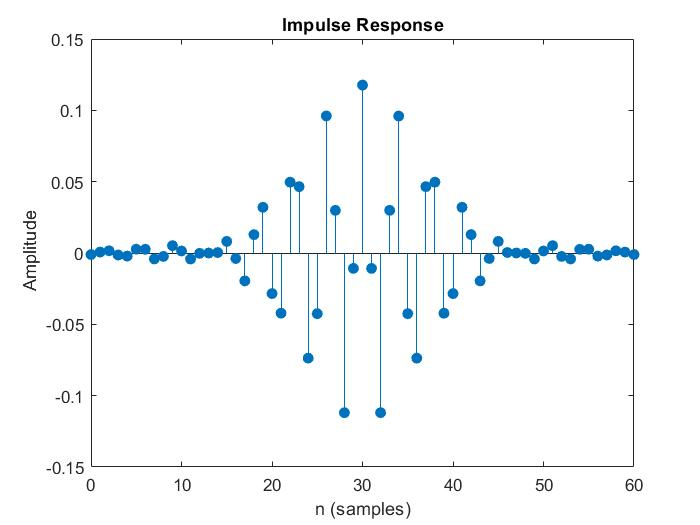

In [ ]:
Image("t4_i.jpg", width=500)

Hamming

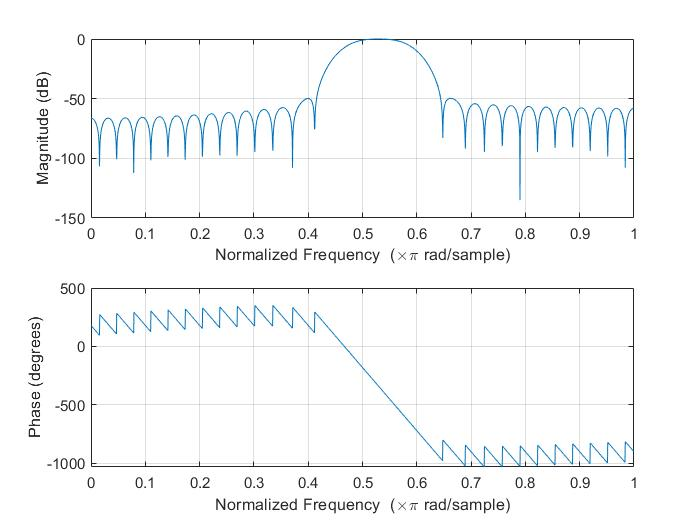

In [ ]:
Image("t4_h.jpg", width=500)

Chebyshev


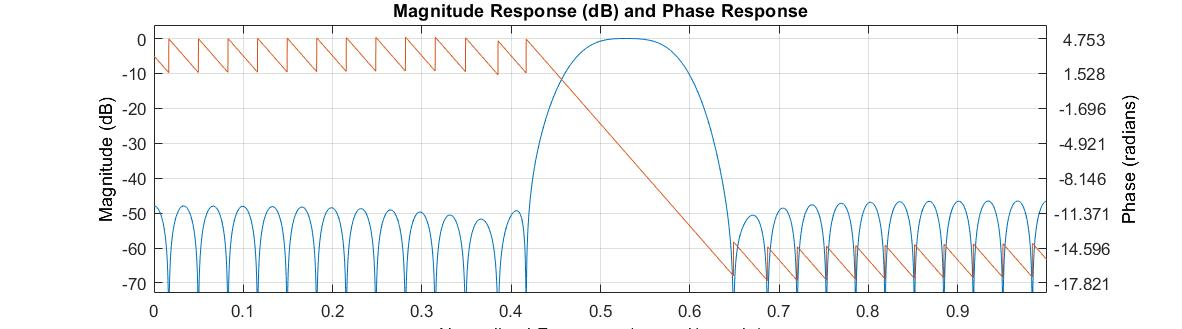

In [ ]:
Image("t4_ch.jpg", width=700)

MATLAB CODE



```
fs = 3.4;
fn = fs / 2;
wn = [0.8, 1.0] / fn; %normalization
n = 60; % n = att_max/(22 * wn)
att_max = 30; 
b1 = fir1(60,wn);
freqz(b1,1,2048);
impz(b1);

b = fir1(n, wn, 'bandpass', chebwin(n + 1, att_max));
fvtool(b);
```



#**Problem 5**
Design a low pass filter with passband $F_{pass} = 4 MHz$ and stopband $F_{stop} = 6MHz$, with attenuation of at least $60dB$. Let the sampling frequency be $F_s = 20MHz$. Using the techniques you know, determine the design with the least number of coefficients. Provide Matlab code.

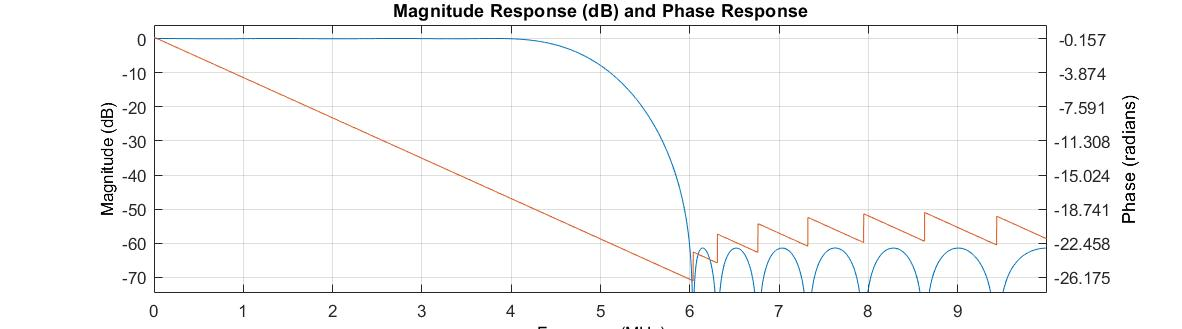

In [ ]:
Image('t5_mp.jpg', width=1000)

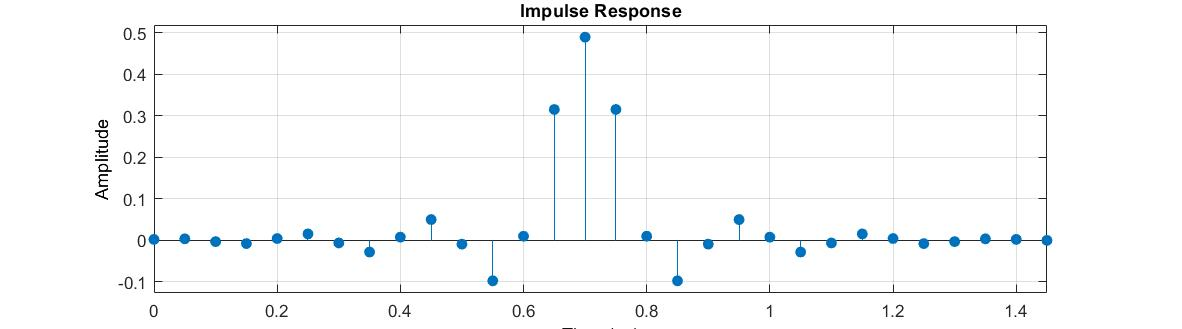

In [ ]:
Image('t5_i.jpg', width=1000)

MATLAB CODE

```
Fpass = 4e6;
Fstop = 6e6;
Fs = 20e6;
Ast = 60;

filtertype = 'FIR';

FIRLPF = dsp.LowpassFilter('SampleRate',Fs, ...
'FilterType',filtertype, ...
'PassbandFrequency',Fpass, ...
'StopbandFrequency',Fstop, ...
'StopbandAttenuation',Ast);
fvtool(FIRLPF,'Analysis','impulse');
fvtool(FIRLPF,'Analysis','freq');

```



#**Problem 6**
Design a low pass filter with passband $F_{pass} = 4 MHz$ and stopband $F_{stop} = 6MHz$, with attenuation of at least $60dB$. Let the sampling frequency be $F_s = 20MHz$. Using the techniques you know, determine the design with the least number of coefficients. Provide Matlab code.

**Solution**

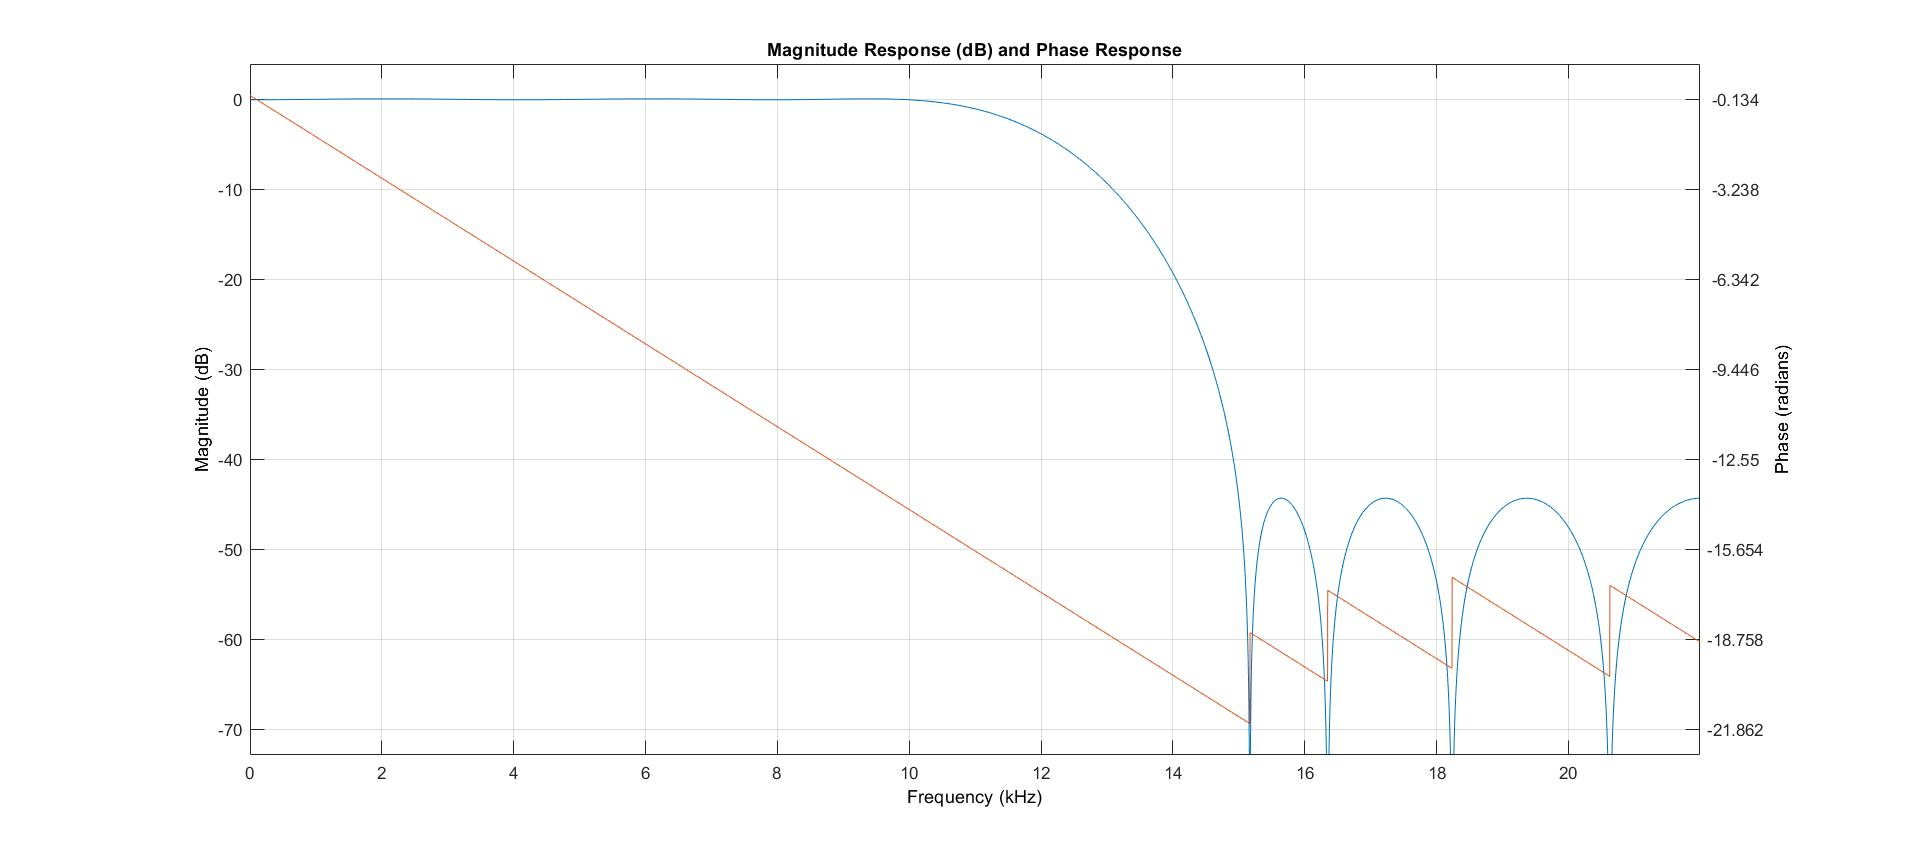

In [ ]:
Image('t6_firpm_mp.jpg', width=1000)

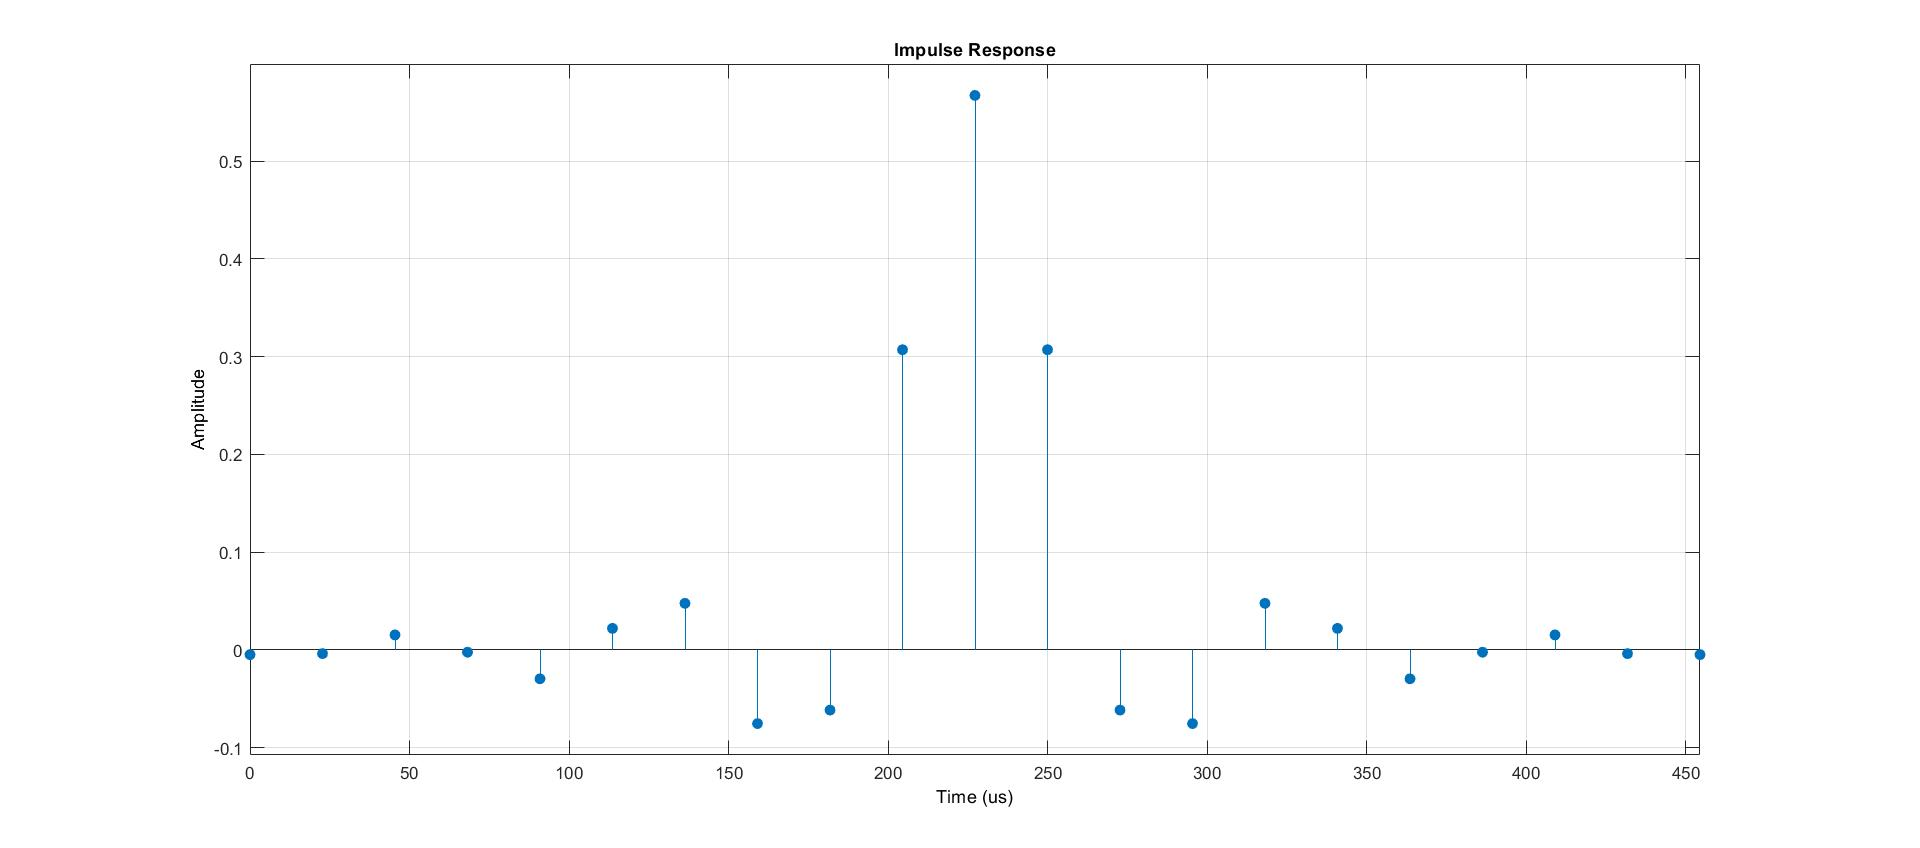

In [ ]:
Image('t6_firpm_i.jpg', width=1000)

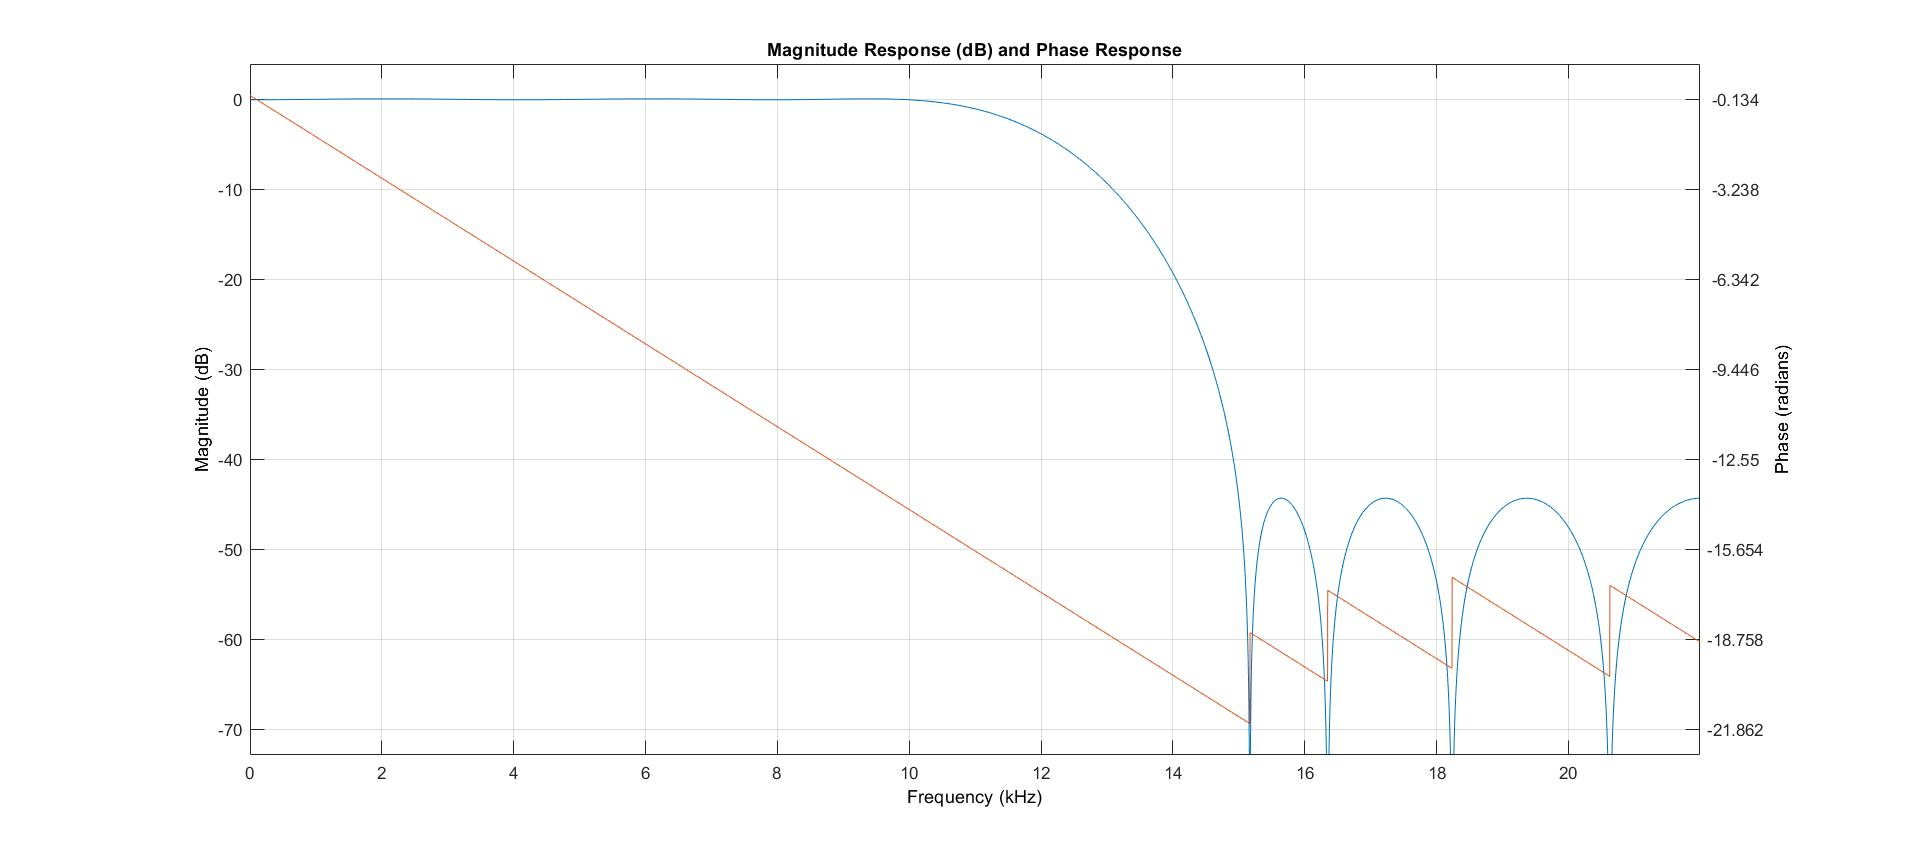

In [ ]:
Image('t6_firls_mp.jpg', width=1000)

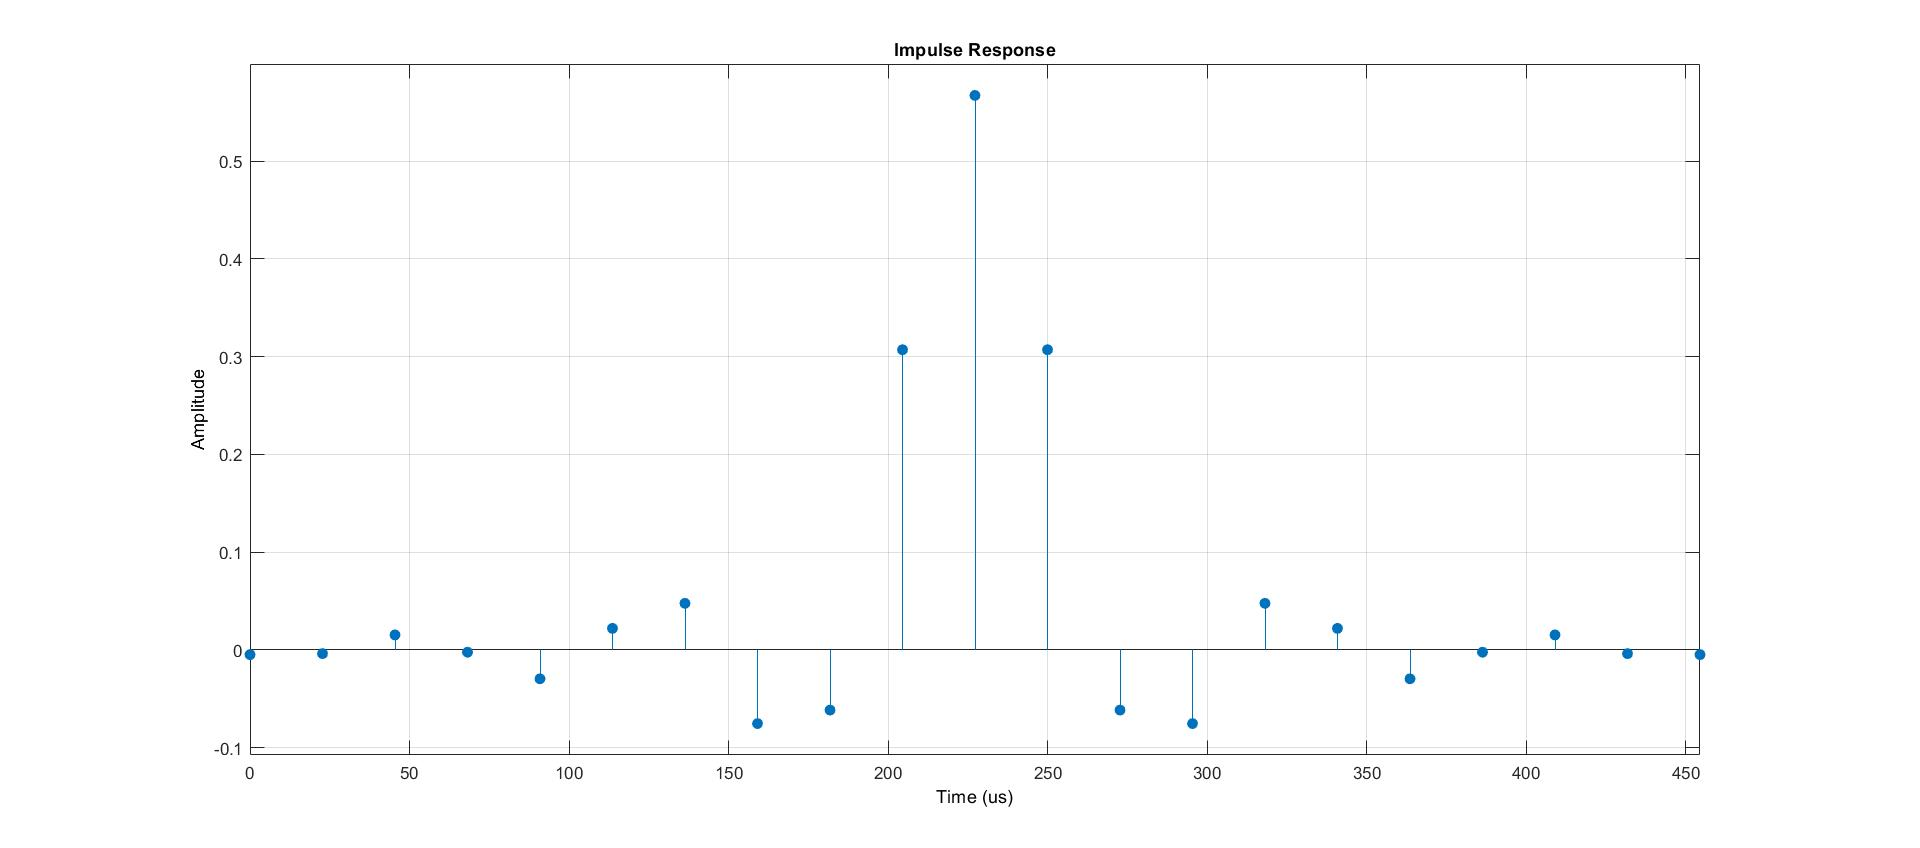

In [ ]:
Image('t6_firls_i.jpg', width=1000)

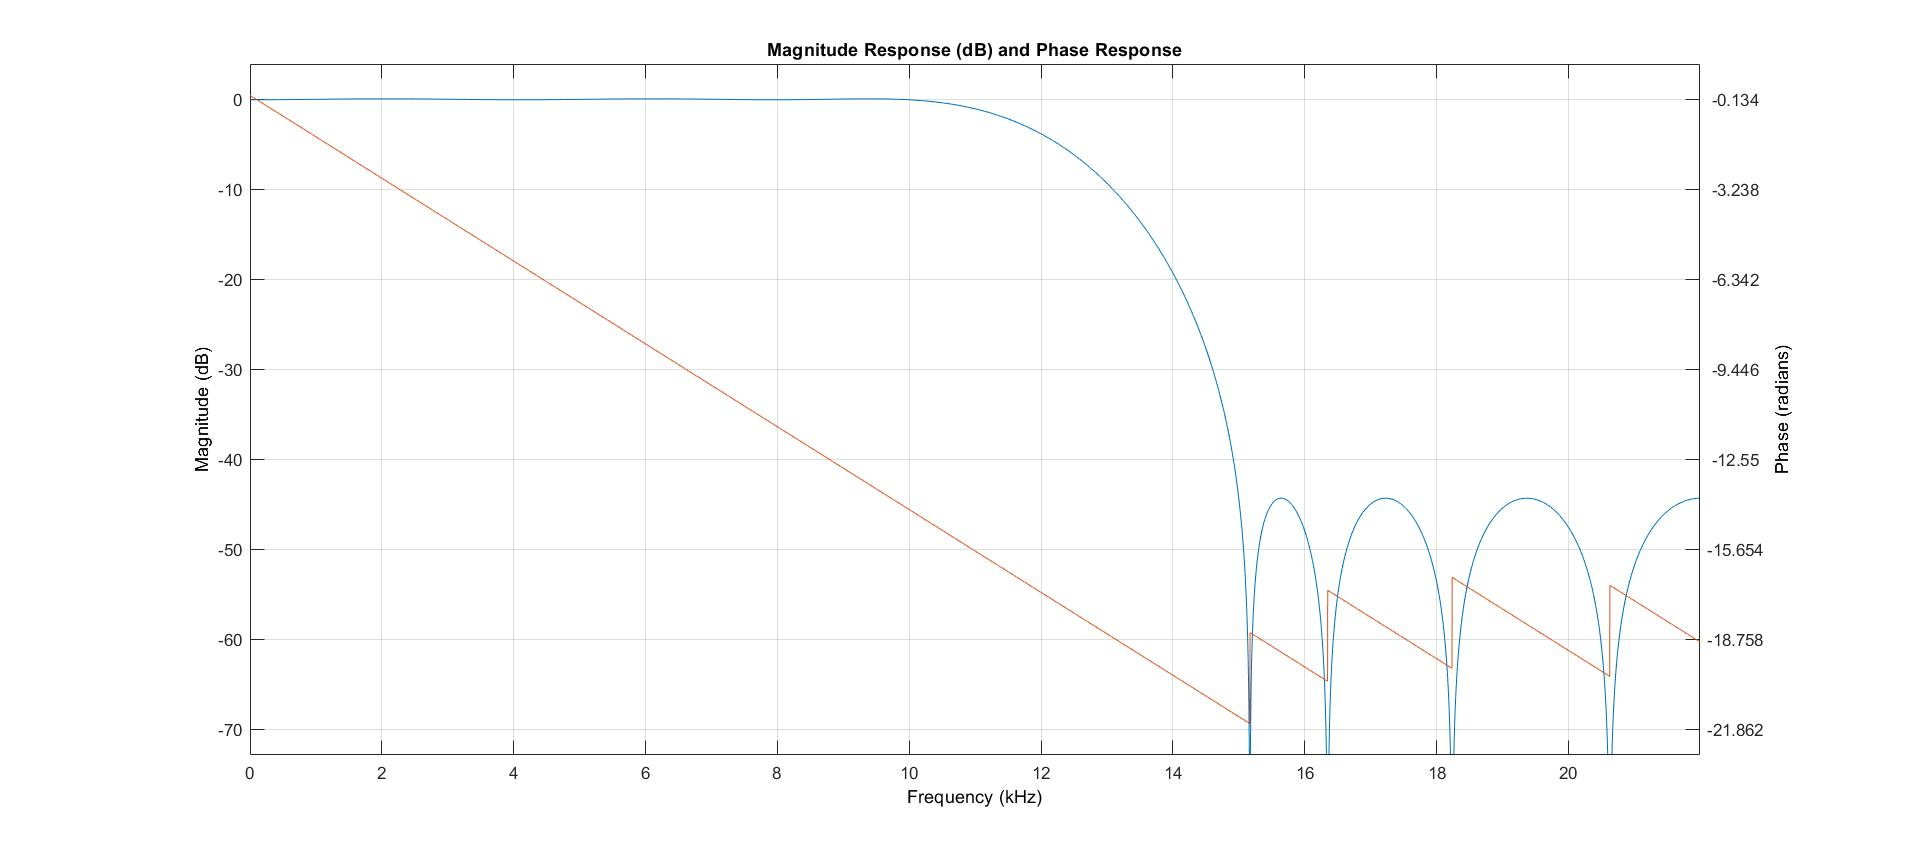

In [ ]:
Image('t6_fir1_mp.jpg', width=1000)

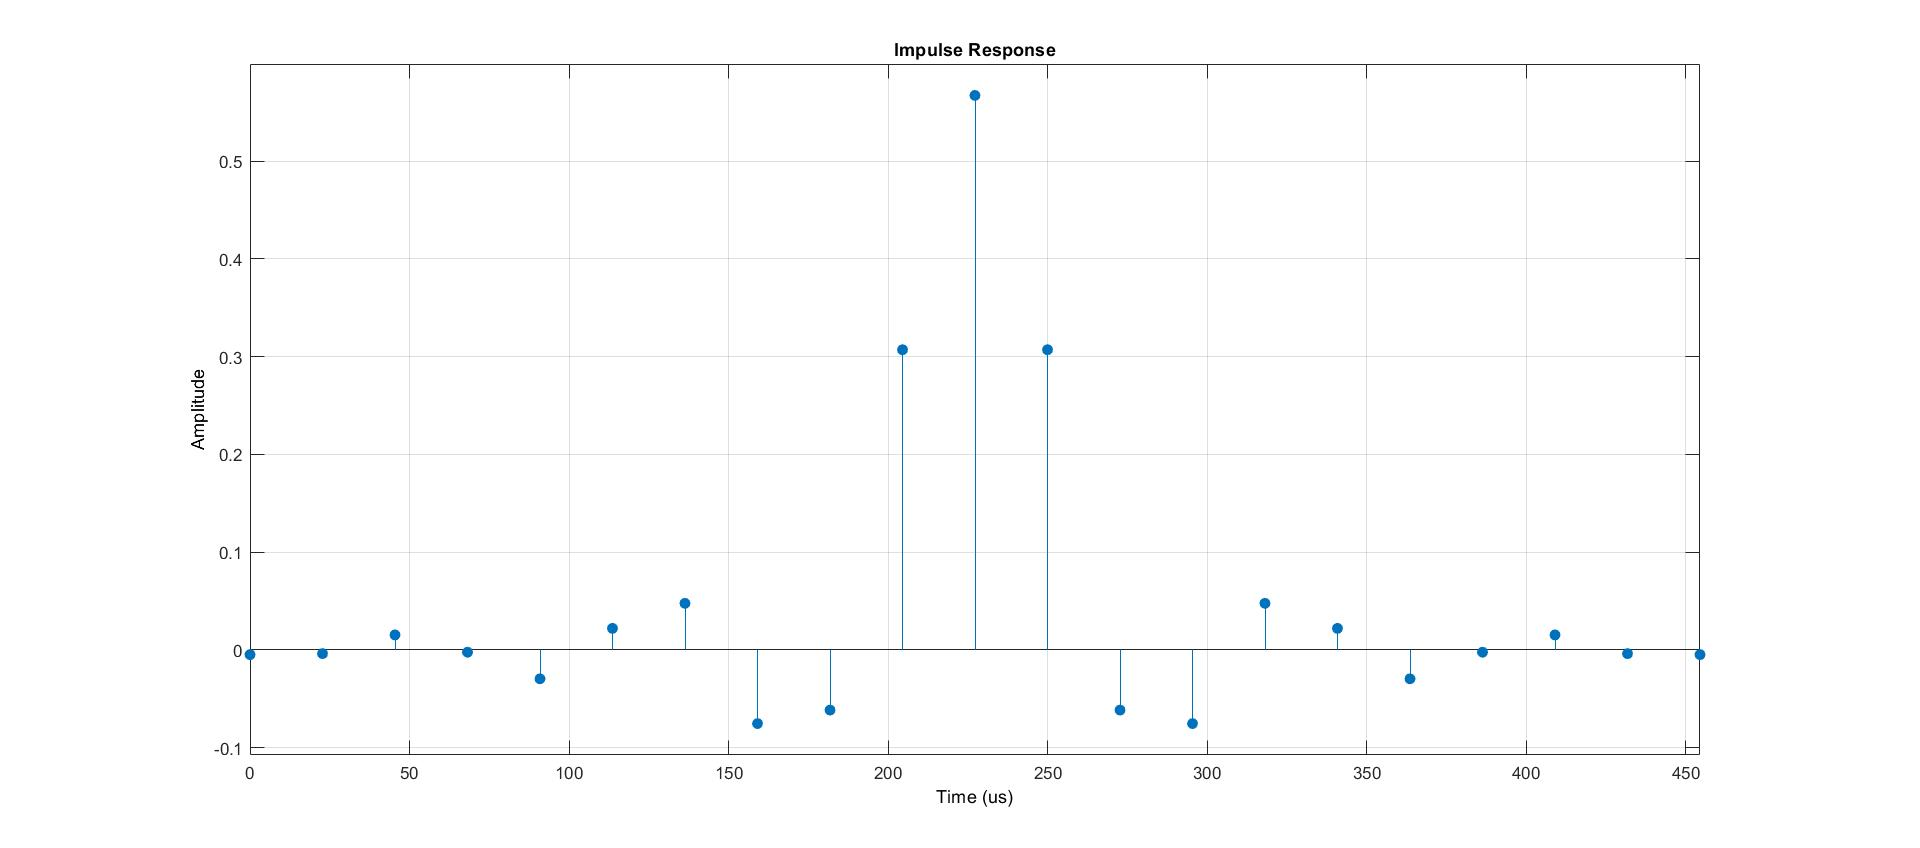

In [ ]:
Image('t6_fir1_i.jpg', width=1000)

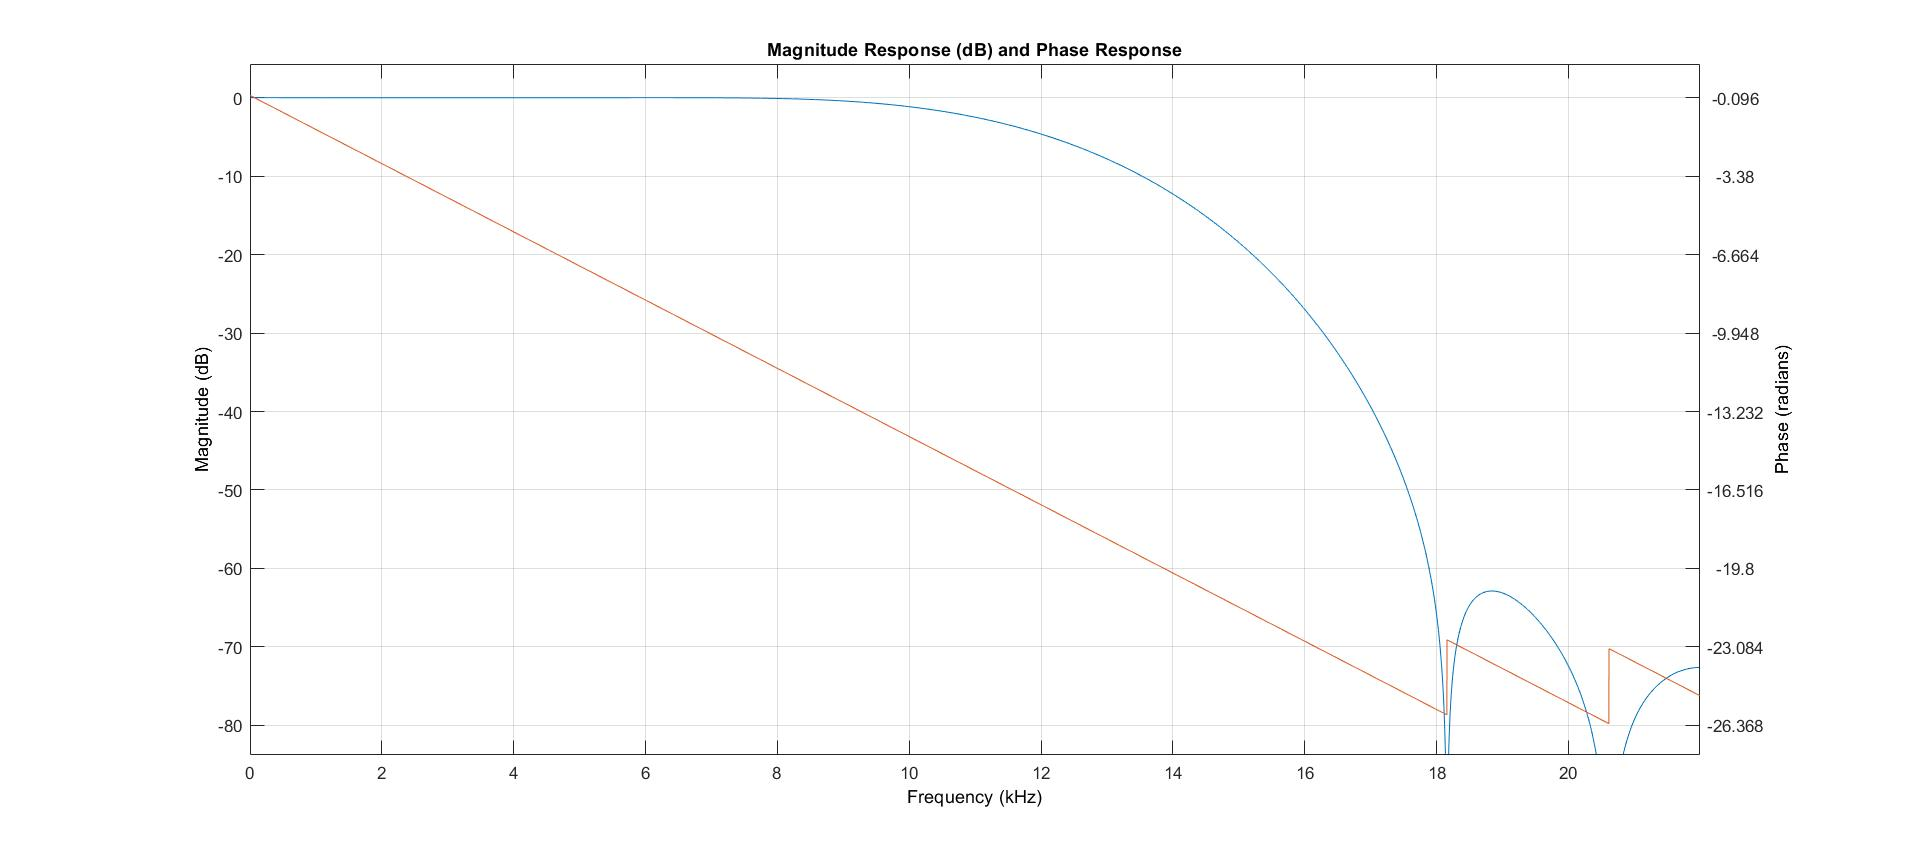

In [ ]:
Image('t6_fir2_mp.jpg', width=1000)

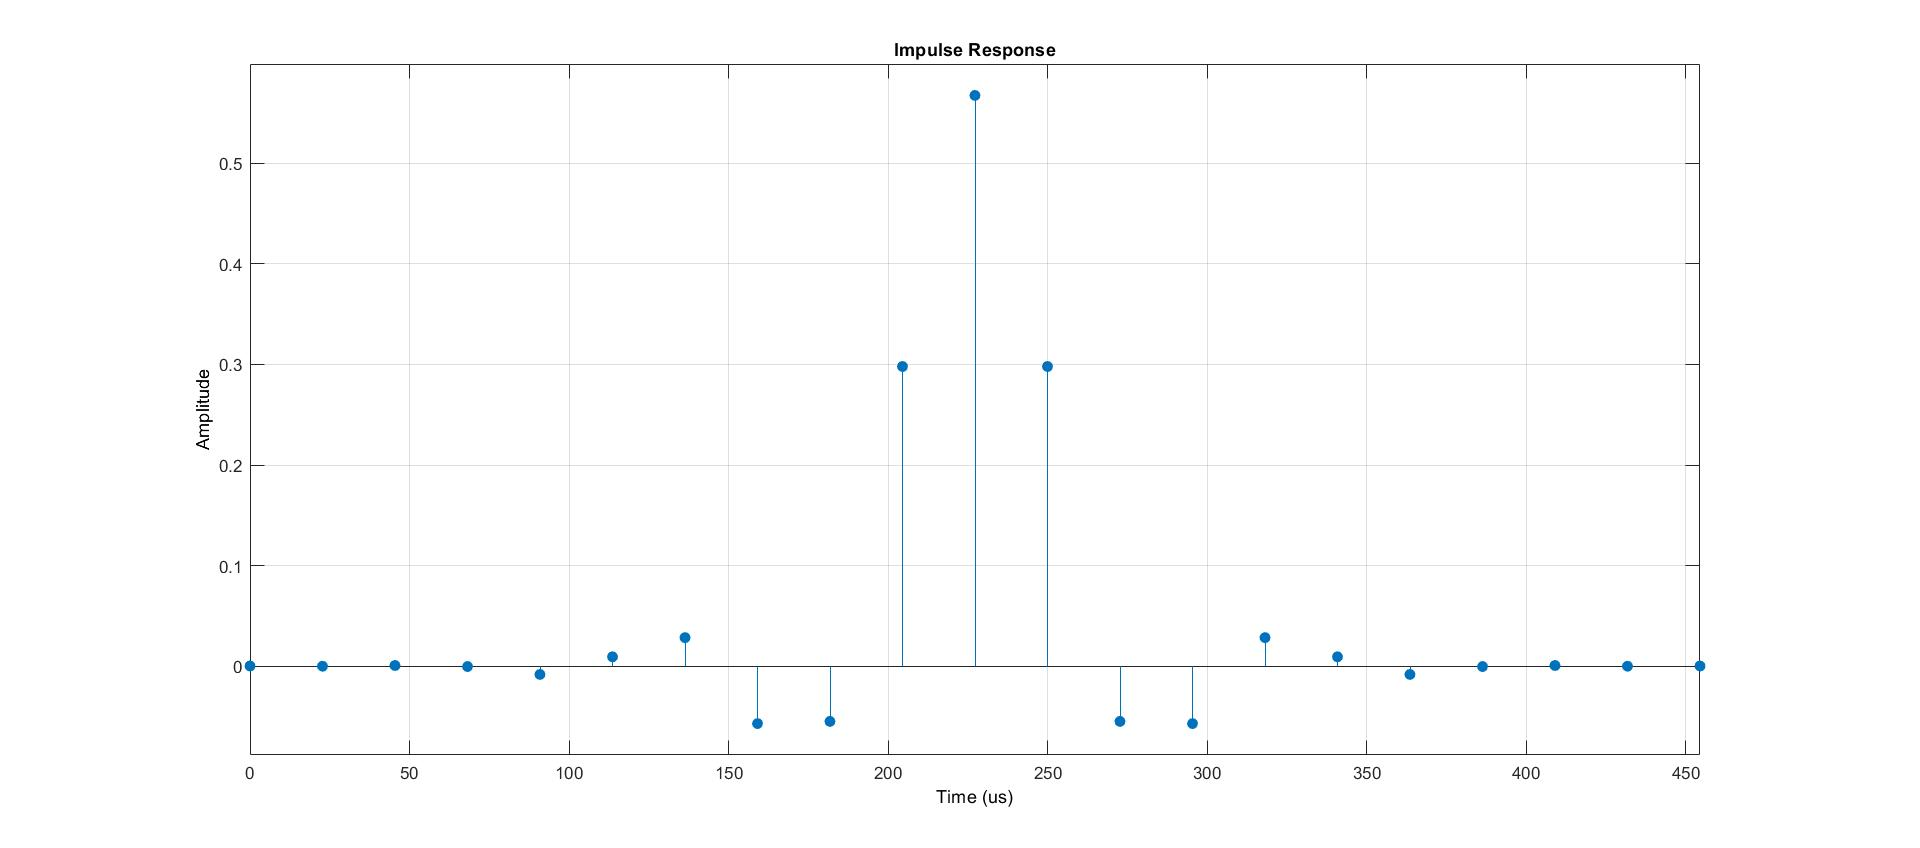

In [ ]:
Image('t6_fir2_i.jpg', width=1000)

MATLAB CODE 

firmp:

```
n = 20; 
Fs = 44e3; 
Fpass = 10e3; 
Fstop = 15e3; 
Ast = 60;
f =  firpm(n, [0 Fpass Fstop Fs/2]/(Fs/2), [1 1 0 0]);
fvtool(f, 'Fs', Fs)

```

firls:


```
firls(n, [0 Fpass Fstop Fs/2]/(Fs/2), [1 1 0 0]);
fvtool(f, 'Fs', Fs)
```


fir1:
```
f = fir1(n, Fpass/(Fs/2));
fvtool(f, 'Fs', Fs)
```


fir2:
```
f = fir2(n, [0 Fpass Fstop Fs/2]/(Fs/2), [1 1 0 0]);
fvtool(f, 'Fs', Fs)

```



#**Problem 7**


Approximate a filter with frequency response
$$
H(f) = \left\{
\begin{array}{}
exp(-|f|/10^{7}) & |f| < 2MHz\\
0 & |f| > 4MHz\\
\end{array}
\right.
$$
Let the sampling frequency be $F_s = 20 MHz$, and the attenuation in the stopband be 50dB. Determine the impulse response of a FIR filter, which approximates this frequency response. Plot the frequency response in terms of magnitude and phase to verify that the approximation holds. Provide Matlab code.

In [ ]:
from scipy import signal
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# utils functions

def plot_design(lets: list, sizes: list, ax, is_label=False):
  assert len(lets) == len(sizes)

  ax.set_title(lets[0], fontsize=sizes[0], color="#000")
  ax.set_xlabel(lets[1], fontsize=sizes[1], color="#333")
  ax.set_ylabel(lets[2], fontsize=sizes[2], color="#333")

  ax.tick_params(labelcolor='#2c3e50', labelsize=int(sizes[2] * .8), width=3)
  if is_label:
    ax.legend(fontsize=int(sizes[2] * .8), loc='upper right')

  return ax

In [ ]:
# constants
fs = 2e7
pass_edge = 2e6
stop_edge = 4e6

# variables
norm_pass_edge = 2 * np.pi * pass_edge / fs
norm_stop_edge = 2 * np.pi * stop_edge / fs

bands_ = np.linspace(0, pass_edge, 30) / fs
desired_ = np.exp(-np.abs(bands_) / 1e7)

bands = np.hstack((bands_,[stop_edge / fs, fs / 2]))
desired = np.hstack((desired_, [0, 0]))

firls = signal.firls(
    numtaps=27, 
    bands=bands, 
    desired=desired, 
    fs=fs
)

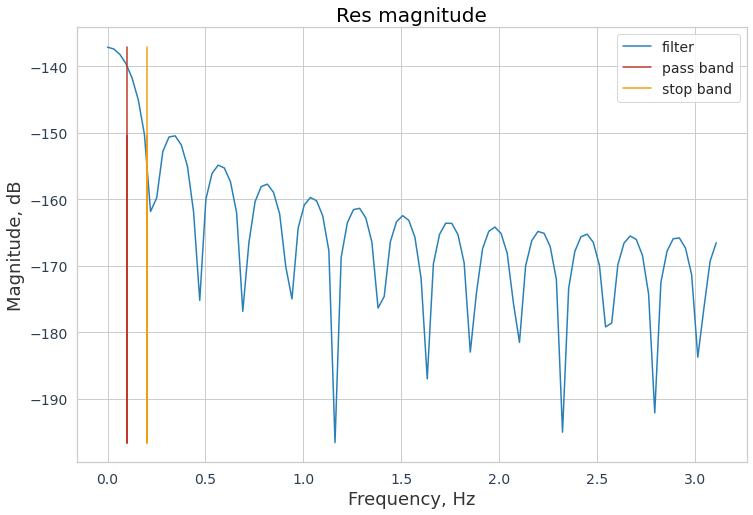

In [ ]:
a = np.array([1] + [0] * (len(firls) - 1))

sys = signal.dlti(firls, a)
w, mag, phase = signal.dbode(sys)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.plot(w, mag, '#2980b9',label='filter')
ax.plot(np.full_like(w, 0.1), mag, color='#c0392b', label='pass band')
ax.plot(np.full_like(w, 0.2), mag, color='#f39c12', label='stop band')

ax = plot_design(
    ['Res magnitude', 'Frequency, Hz', 'Magnitude, dB'],
    [20, 18, 18],
    ax,
    True
)

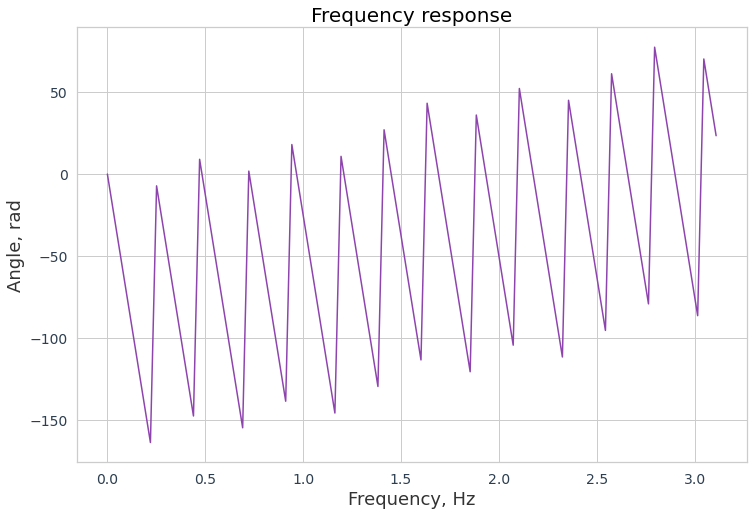

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.plot(w, phase, '#8e44ad')

ax = plot_design(
    ['Frequency response', 'Frequency, Hz', 'Angle, rad'],
    [20, 18, 18],
    ax
)

#**Problem 8**
Using the Bilinear Transformation, calculate Elliptic analog lowpass filter prototype for the following discrete time design:  
a) passband $5MHz$;  
b) stopband $6MHz$;  
c) passband ripple $0.1dB$;  
d) stopband attenuation $50dB$;  
e) sampling frequency $F_s = 18MHz$.  
Plot impulse response and step response for analog and digital systems.  
Plot magnitude response for analog and digital systems. Provide Matlab code.

In [ ]:
Fs = 18e6; 
Fpass = 5e6; 
Fstop = 6e6;
Atn = 50; 
rp = 0.1;

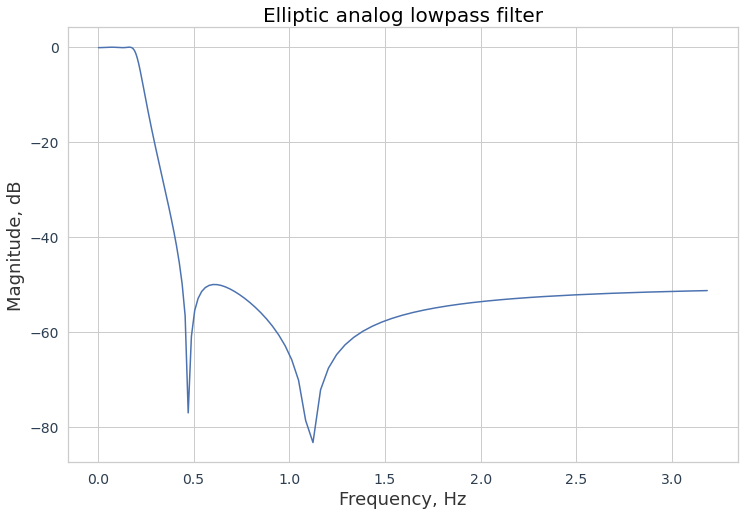

In [ ]:
# frequency
f = Fpass/(Fs/2)
b, a = signal.ellip(4, rp, Atn, f, btype='low',analog=True)
w, h = signal.freqs(b, a)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(w/pi, 20*np.log10(abs(h)))

ax = plot_design(
    ['Elliptic analog lowpass filter', 'Frequency, Hz', 'Magnitude, dB'],
    [20, 18, 18],
    ax
)

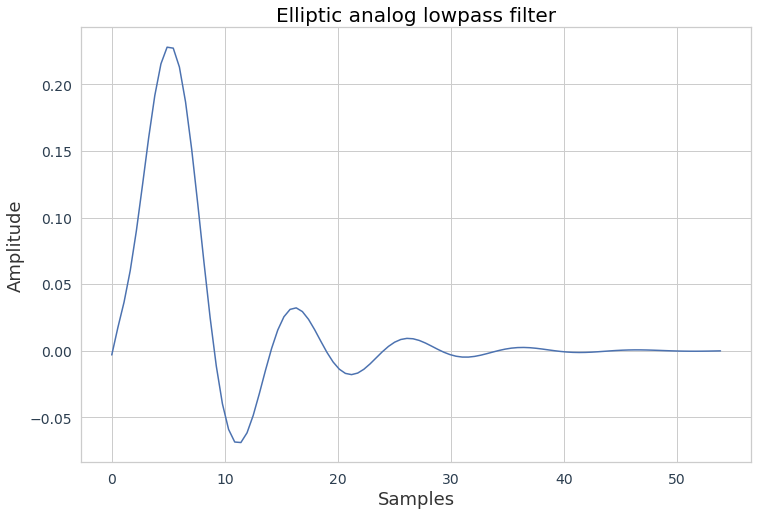

In [ ]:
# impylse
syst = (b,a)
s, q = signal.impulse(syst)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.plot(s, q)
ax = plot_design(
    ['Elliptic analog lowpass filter', 'Samples', 'Amplitude'],
    [20, 18, 18],
    ax)

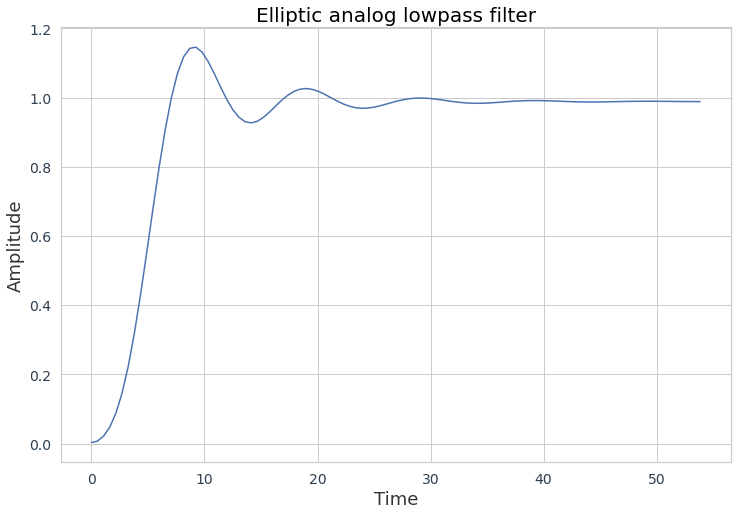

In [ ]:
# step
lti = signal.lti(b, a)
t, q = signal.step(lti)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.plot(t, q)
ax = plot_design(
    ['Elliptic analog lowpass filter', 'Time', 'Amplitude'],
    [20, 18, 18],
    ax)

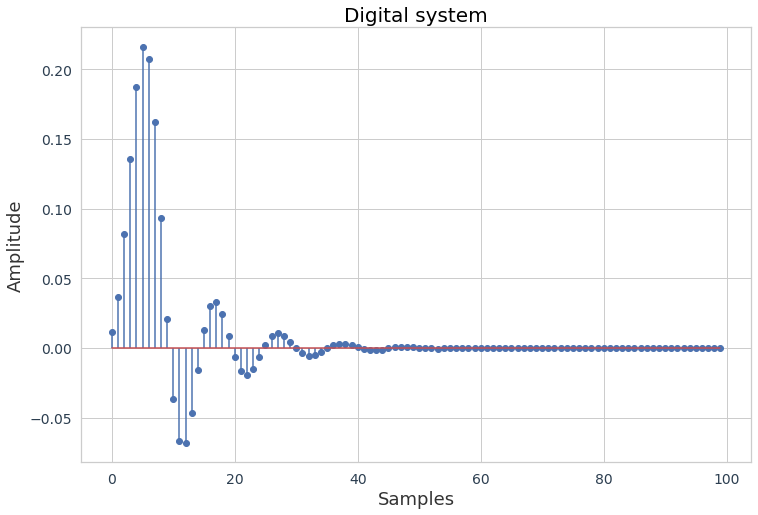

In [ ]:
# response 
fs= Fs
b,a = signal.ellip(4, rp, Atn, f, btype='low',analog=True)
analog = signal.lti(b,a)
dig = signal.dlti(*signal.bilinear(analog.num,analog.den))
t, q = signal.dimpulse(dig)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.stem(t, q[0], use_line_collection=True)
#ax.plot(t, q[0])
ax = plot_design(
    ['Digital system', 'Samples', 'Amplitude'],
    [20, 18, 18],
    ax)

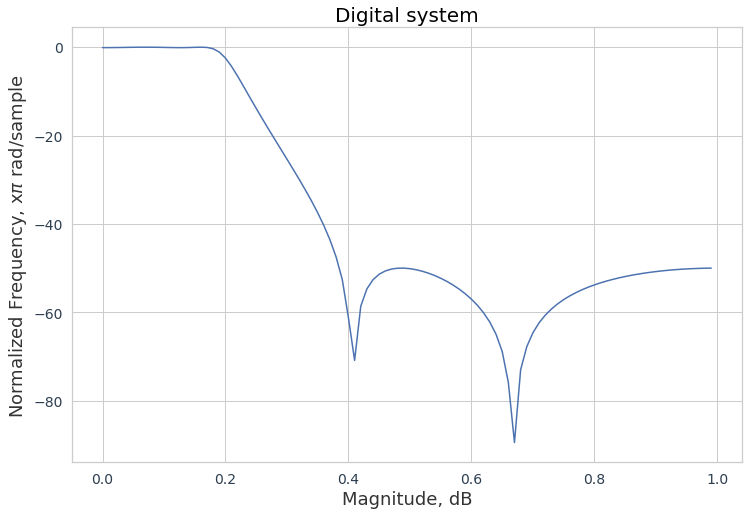

In [ ]:
w, mag, phase = signal.dbode(dig)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.plot(w/np.pi, mag)
ax = plot_design(
    ['Digital system', 'Magnitude, dB', 'Normalized Frequency, x$\pi$ rad/sample'],
    [20, 18, 18],
    ax)

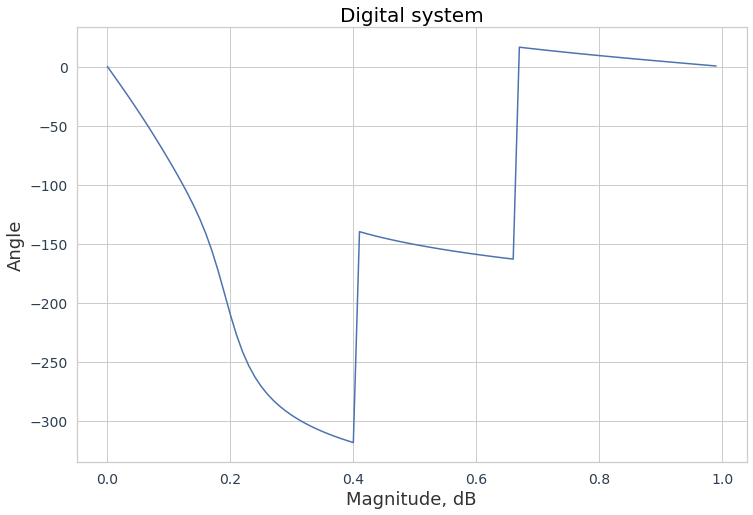

In [ ]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(w/pi, phase)
ax = plot_design(
    ['Digital system', 'Magnitude, dB', 'Angle'],
    [20, 18, 18],
    ax)

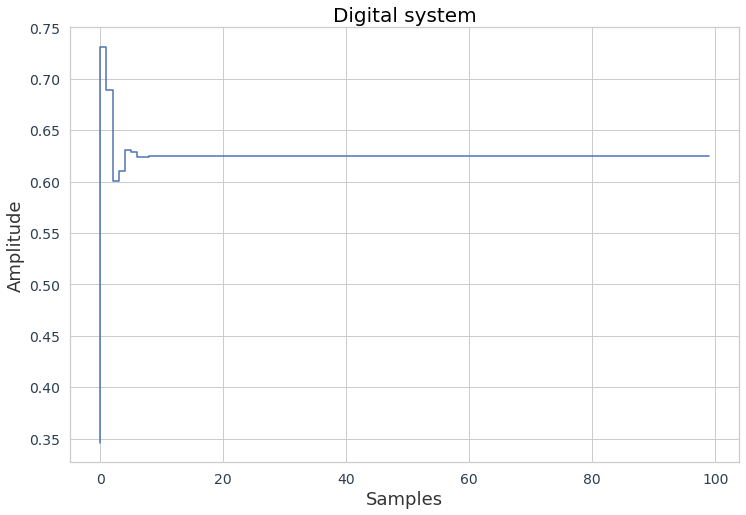

In [ ]:
# step
t, q = signal.dstep(digital)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.step(t, np.squeeze(q))
ax = plot_design(
    ['Digital system', 'Samples', 'Amplitude'],
    [20, 18, 18],
    ax)


#**Problem 9**

Using the Impulse invariance method for analog to digital filter conversion, calculate Chebyshev analog lowpass filter prototype for the following discrete time design:  
a) passband $10MHz$;  
b) stopband $15MHz$;  
c) passband ripple $0.5dB$;  
d) stopband attenuation $55dB$;  
e) sampling frequency $F_s = 80MHz$.  
Plot impulse response for analog and digital systems.  
Plot magnitude response for analog and digital systems. Provide Matlab code.  

#**Problem 10**
Implement the analog filter with transfer function
$$H(s) = \frac{s + 2.5}{s^2 + 2.5s + 4}$$
by a discrete time approximation, using the Bilinear Transformation. Sample clock frequency is $F_s = 20Hz$.  
a) Determine the Linear Difference Equation of the discrete time implementation  
b) Plot the impulse and frequency responses of the digital filter and the analog filter.  
Provide Matlab code.

**Solution**
$$
H(S) = K\frac{S + 2/5}{(S + 1.25 - 1.56i)(S + 1.25 + 1.56i)} \\\\
S = \frac{2}{F_s} \frac{z - 1}{z + 1} = 2F_s \frac{Z-1}{Z+1} => z = \frac{s + 2F_s}{s - 2F_s} \\ F_s = 20 => z = 0.8823, z = -1\ -\ zeros \\
S = -1.25 + 1.56i,\ z = -\frac {( -1.25 \pm 1.56i) + 2F_s}{( -1.25 \pm 1.56i)- 2F_s} = 0.9366 \mp 0.0732i\ -\ poles \\
H(z) = \frac {(z+1)(z-0.8823)}{(z -0.9366 - 0.0732i )(z -0.9366 + 0.0732i)}K =  \frac {z^2+0.1177z -0.8823}{z^2 -1.873z +0.882364} K \\
H(0) = 0.625 => k = 0.024  \\ 
H(z) =  0.024 \frac {z^2+0.118z -0.882}{z^2 -1.873z +0.882} = \frac {0.024z^2+0.003z -0.022}{z^2 -1.873z +0.882} = \frac{Y(z)}{X(z)} \\ y[n] -1.873y[n-1] +0.882y[n-2] = 0.025x[n]+0.003x[n-1] -0.022x[n-2]
$$

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

b1 = np.array([0, 1, 2.5])
a1 = np.array([1, 2.5, 4])
b2 = np.array([0.025,0.003,-0.022])
a2 = np.array([1,-1.873,0.882])

analog = signal.lti(b1, a1)
t_1, y_1 = signal.impulse(analog)

digital = signal.dlti(b2,a2)
t_2, y_2 = signal.dimpulse(digital)
y_2 = y_2[0]

/usr/local/lib/python3.6/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


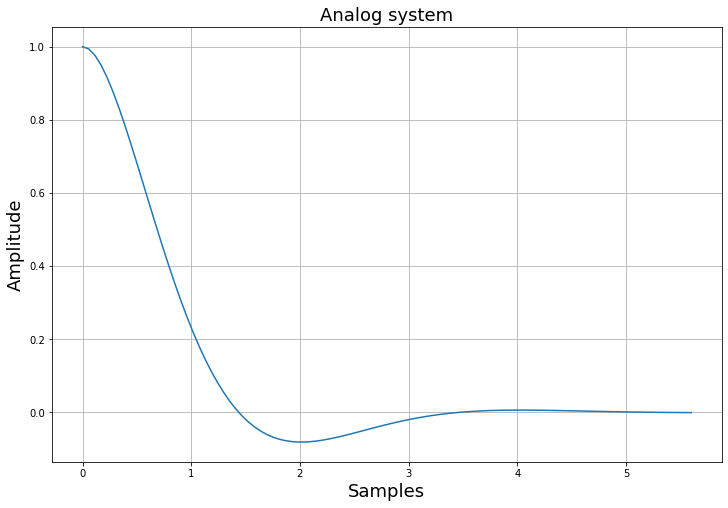

In [ ]:
# impulse responce
plt.figure(figsize=(12, 8))
plt.plot(t_1, y_1)
plt.title('Analog system', fontsize=18)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.grid()

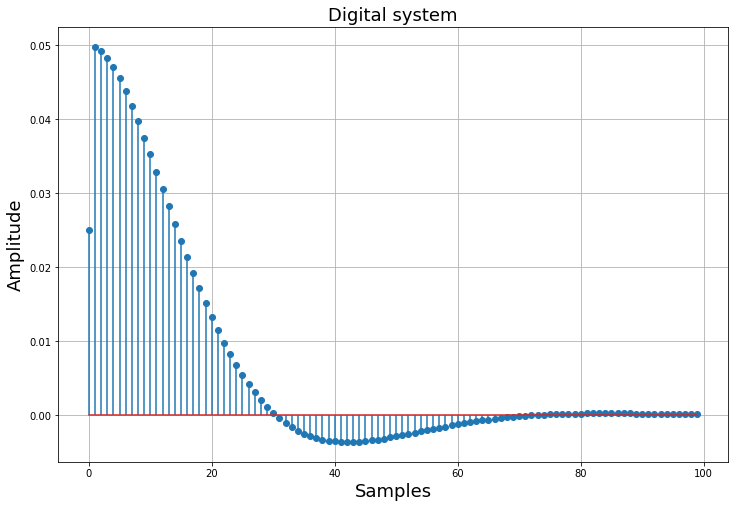

In [ ]:
# impulse responce
plt.figure(figsize=(12, 8))
plt.stem(t_2, y_2,use_line_collection=True)
plt.title('Digital system', fontsize=18)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.grid()

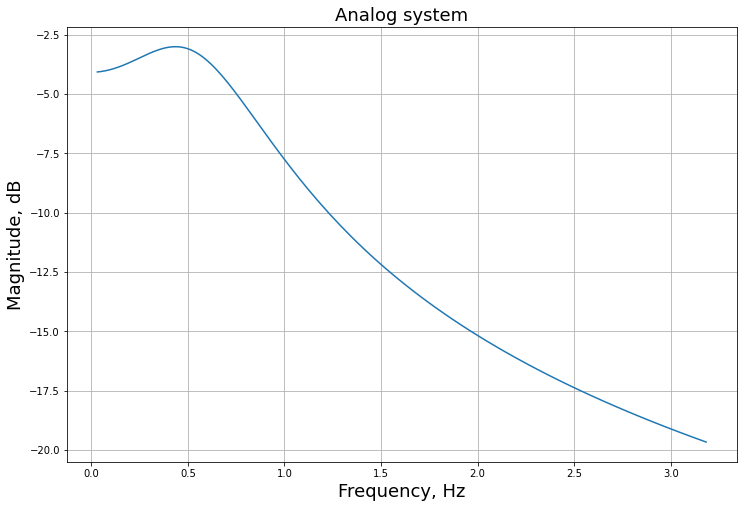

In [ ]:
w1, h1 = signal.freqs(b1, a1)
w2, h2 = signal.freqz(b2, a2)

# Frequency responce
plt.figure(figsize=(12, 8))
plt.plot(w1/np.pi,20 * np.log10(abs(h1)))
plt.title('Analog system', fontsize=18)
plt.xlabel('Frequency, Hz', fontsize=18)
plt.ylabel('Magnitude, dB', fontsize=18)
plt.grid()




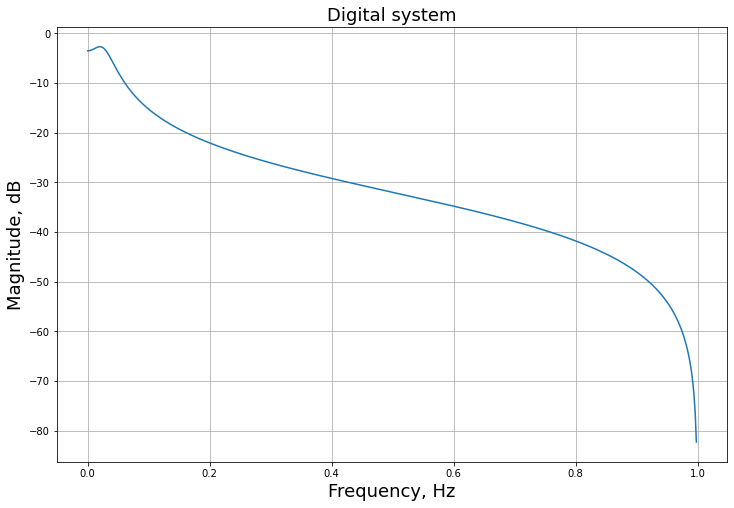

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(w2/np.pi,20 * np.log10(abs(h2)))
plt.title('Digital system', fontsize=18)
plt.xlabel('Frequency, Hz', fontsize=18)
plt.ylabel('Magnitude, dB', fontsize=18)
plt.grid()


#**Problem 11**
An integrator has transfer function
$$H(s) = \frac{s}{5}$$
a) Determine a discrete time implementation using Euler's approximation, with sampling frequency $F_s = 12Hz$.  
Plot the frequency response, and verify that it approximates the integrator for low frequencies.  
  
b) Determine a discrete time implementation using Bilinear Transformation approximation, with sampling frequency $F_s = 24Hz$.  

Plot the frequency response, and verify that it approximates the integrator for low frequencies.  
  
Compare results. Plot impulse and frequency response. Provide Matlab code.

**Solution**


**A.**
$$
S = \frac{1 - z^{-1}}{T_s} \\
T_s = \frac{1}{F_s} => H(z) = 5 \frac{1}{F_s(1 - z^{-1})} = \frac{5}{12} \frac{z}{z-1}\\
F_s = 12\ =>\ H(j\omega) \frac{5}{12}\frac{e^{j\omega}}{e^{j\omega} - 1} \\
\omega -> 0 => e^{j\omega} -> 1 \\
H(\omega) = \frac{5}{12} \frac{1}{1 + j\omega -1} = \frac{5}{j\omega F_s} =\frac {0.416}{1 - z^{-1}}
$$

**B.**
$$
S = 2F_s{z-1}{1 + z} => H(z) = \frac{5}{2F_s} \frac{z + 1}{z - 1} = 0.10416 \frac{z+1}{z-1}=> \\
H(\omega) = \frac{5}{48} \frac{e^{j\omega} + 1}{e^{j\omega} 0 1} = \frac{5 * 2}{48 j\omega}
$$

In [ ]:
a1 = np.array([1,-1])
b1 = np.array([0.416, 0])
a2 = np.array([1,-1])
b2 = np.array([0.10416, 0.10416])

system1 = signal.dlti(b1, a1)
system2 = signal.dlti(b2, a2)

w1, mag1, phase1 = signal.dbode(system1)
w2, mag2, phase2 = signal.dbode(system2)

t1, y1 = signal.dimpulse(system1)
n = 36
t1 = t1[:n]
y1 = y1[0][:n]

t2, y2 = signal.dimpulse(system2)
n = 36
t2 = t2[:n]
y2 = y2[0][:n]

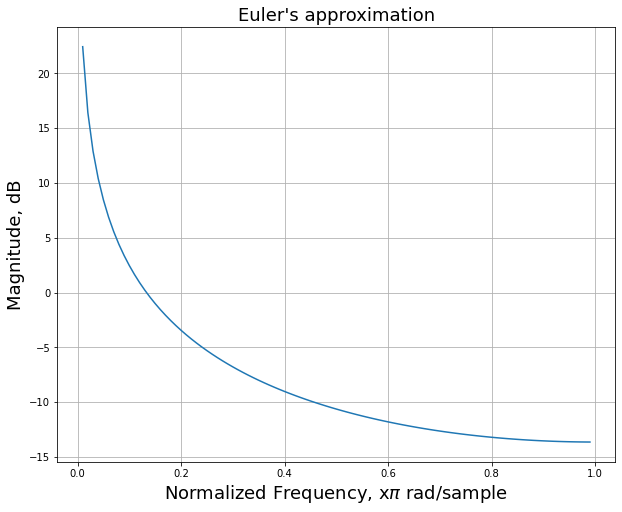

In [ ]:
from math import pi

#frequency 
plt.figure(figsize=(10, 8))
plt.plot(w1/pi, mag1)
plt.title("Euler's approximation", fontsize=18)
plt.ylabel('Magnitude, dB',fontsize=18)
plt.xlabel('Normalized Frequency, x$\pi$ rad/sample',fontsize=18)
plt.grid()


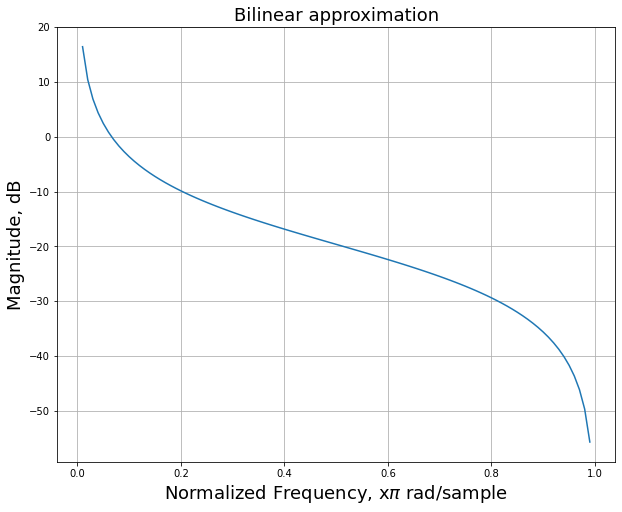

In [ ]:
#frequency 

plt.figure(figsize=(10, 8))
plt.plot(w2/pi, mag2)
plt.title("Bilinear approximation", fontsize=18)
plt.ylabel('Magnitude, dB',fontsize=18)
plt.xlabel('Normalized Frequency, x$\pi$ rad/sample',fontsize=18)
plt.grid()


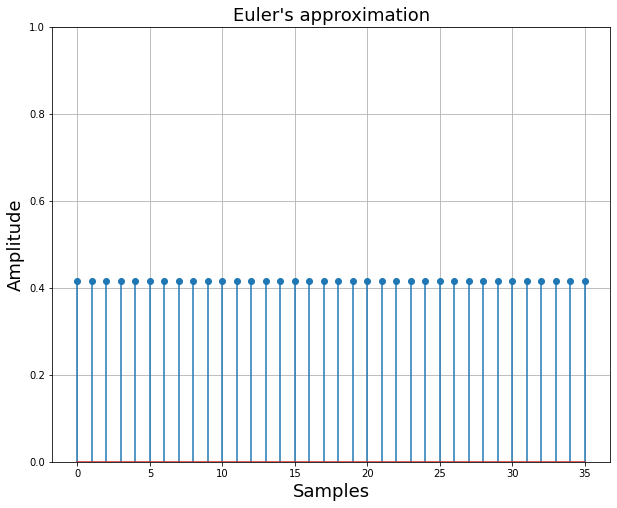

In [ ]:
# response 

plt.figure(figsize=(10, 8))
plt.stem(t1, y1,use_line_collection=True)
plt.title("Euler's approximation", fontsize=18)
plt.xlabel('Samples', fontsize=18)
plt.ylim(0, 1)
plt.ylabel('Amplitude', fontsize=18)
plt.grid()

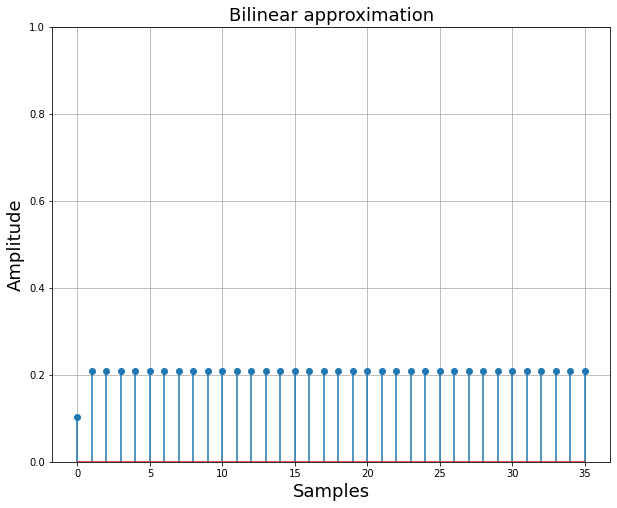

In [ ]:
# response 

plt.figure(figsize=(10, 8))
plt.stem(t2, y2, use_line_collection=True)
plt.title("Bilinear approximation", fontsize=18)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.ylim(0, 1)
plt.grid()

#**Problem 12**
An FIR Filter has transfer function
$$ H(z) = 3 + 4z^{-1} + 6z^{-2} + 8z^{-3}$$
Determine the Impulse Response of the filter with the modified frequency
response $F(\omega) = H(\omega - \pi / 6)$.

**Solution**

$$ H(z) = 3 + 4z^{-1} + 6z^{-2} + 8z^{-3} \\
H(\omega) = 3 + 4e^{-j\omega} + 6e^{-2j\omega} + 8e^{-3j\omega}\\
F(\omega) = H(\omega - \pi / 6) = 3 + 4e^{-j(\omega - \pi / 6)} + 6e^{-2j(\omega - \pi / 6)} + 8e^{-3j(\omega - \pi / 6)} =  3 + 4z^{-1}e^{j\pi / 6} + 6z^{-2}e^{j\pi / 3} + 8z^{-3}e^{j\pi / 2}\\
h[n] =  3\delta[n] + 4e^{j\pi / 6}\delta[n-1] + 6e^{j\pi / 3}\delta[n-2] + 8e^{j\pi / 2}\delta[n-3]$$

#**Problem 13**
A digital filter is defined by the transfer function:
$$ H(z) = \frac{2 - 3.5z^{-1} - 4.5z^{-2}}{2 - 1.5z^{-1} - 3.5z^{-2}}$$
Draw the block diagram representation of the filter in Direct-Form 1 and Direct-
Form 2. Plot impulse and frequency responses. Provide Matlab code.

**Solution**

$$ H(z) = \frac{2 - 3.5z^{-1} - 4.5z^{-2}}{2 - 1.5z^{-1} - 3.5z^{-2}}\\
Y(z)(2 - 1.5z^{-1} - 3.5z^{-2}) = X(z)(2 - 3.5z^{-1} - 4.5z^{-2}) => \\
y(z) = 0.75y(z)z^{-1} + 1.75y(z)z^{-2} + x(z) - 1.75x(z)z^{-1} - 2.25x(z)z^{-2}$$

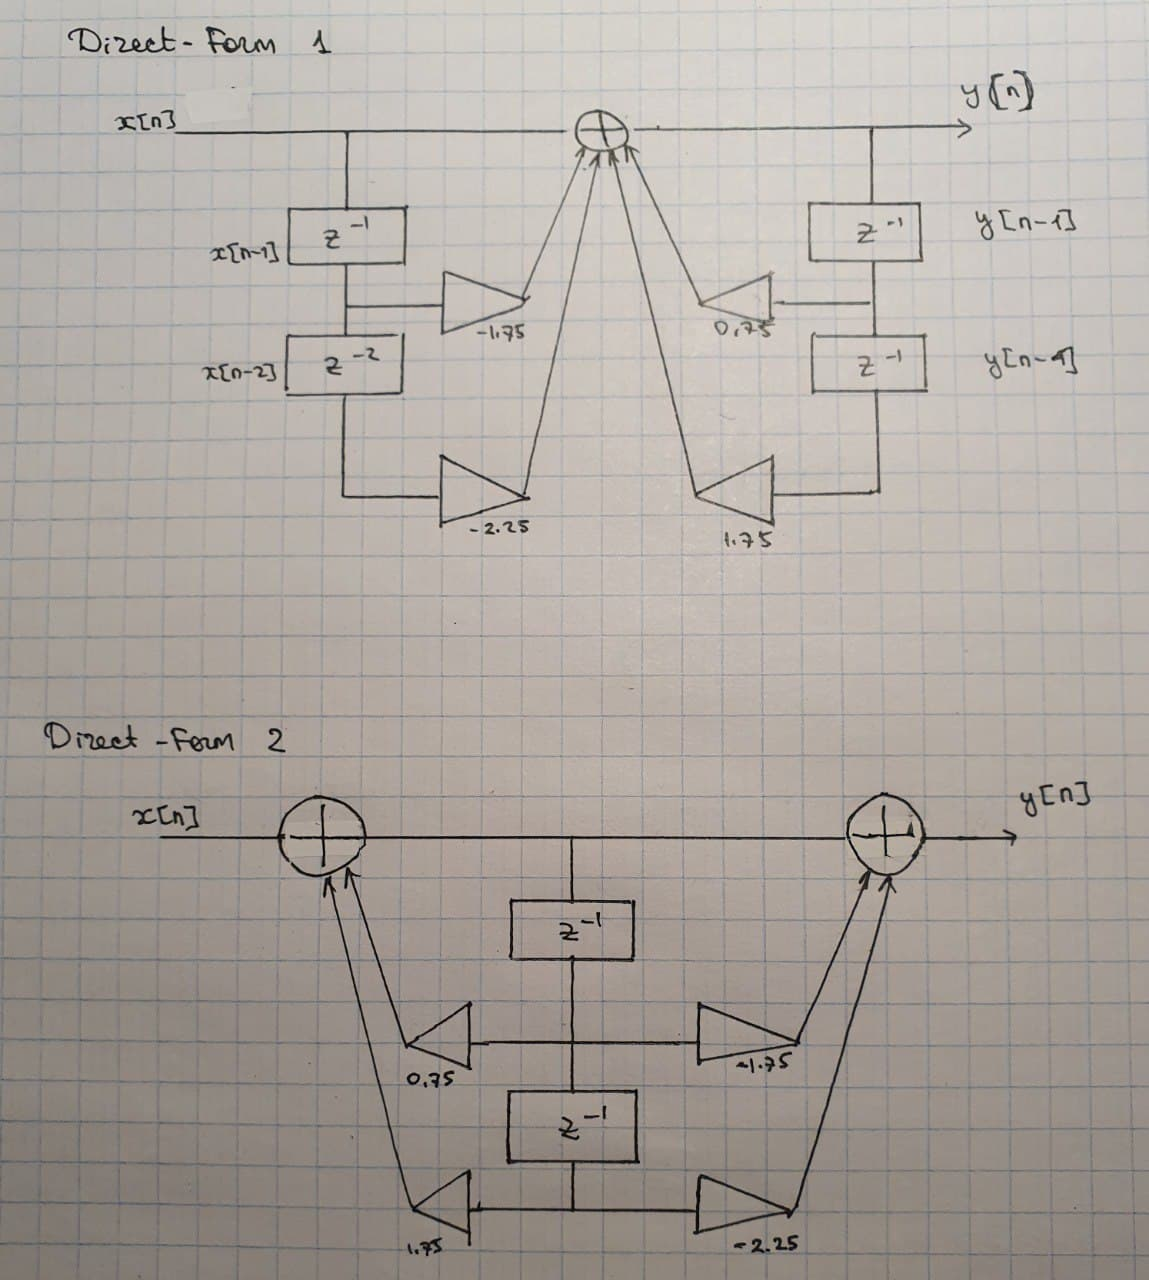

In [ ]:
Image("13.jpg", width=500)

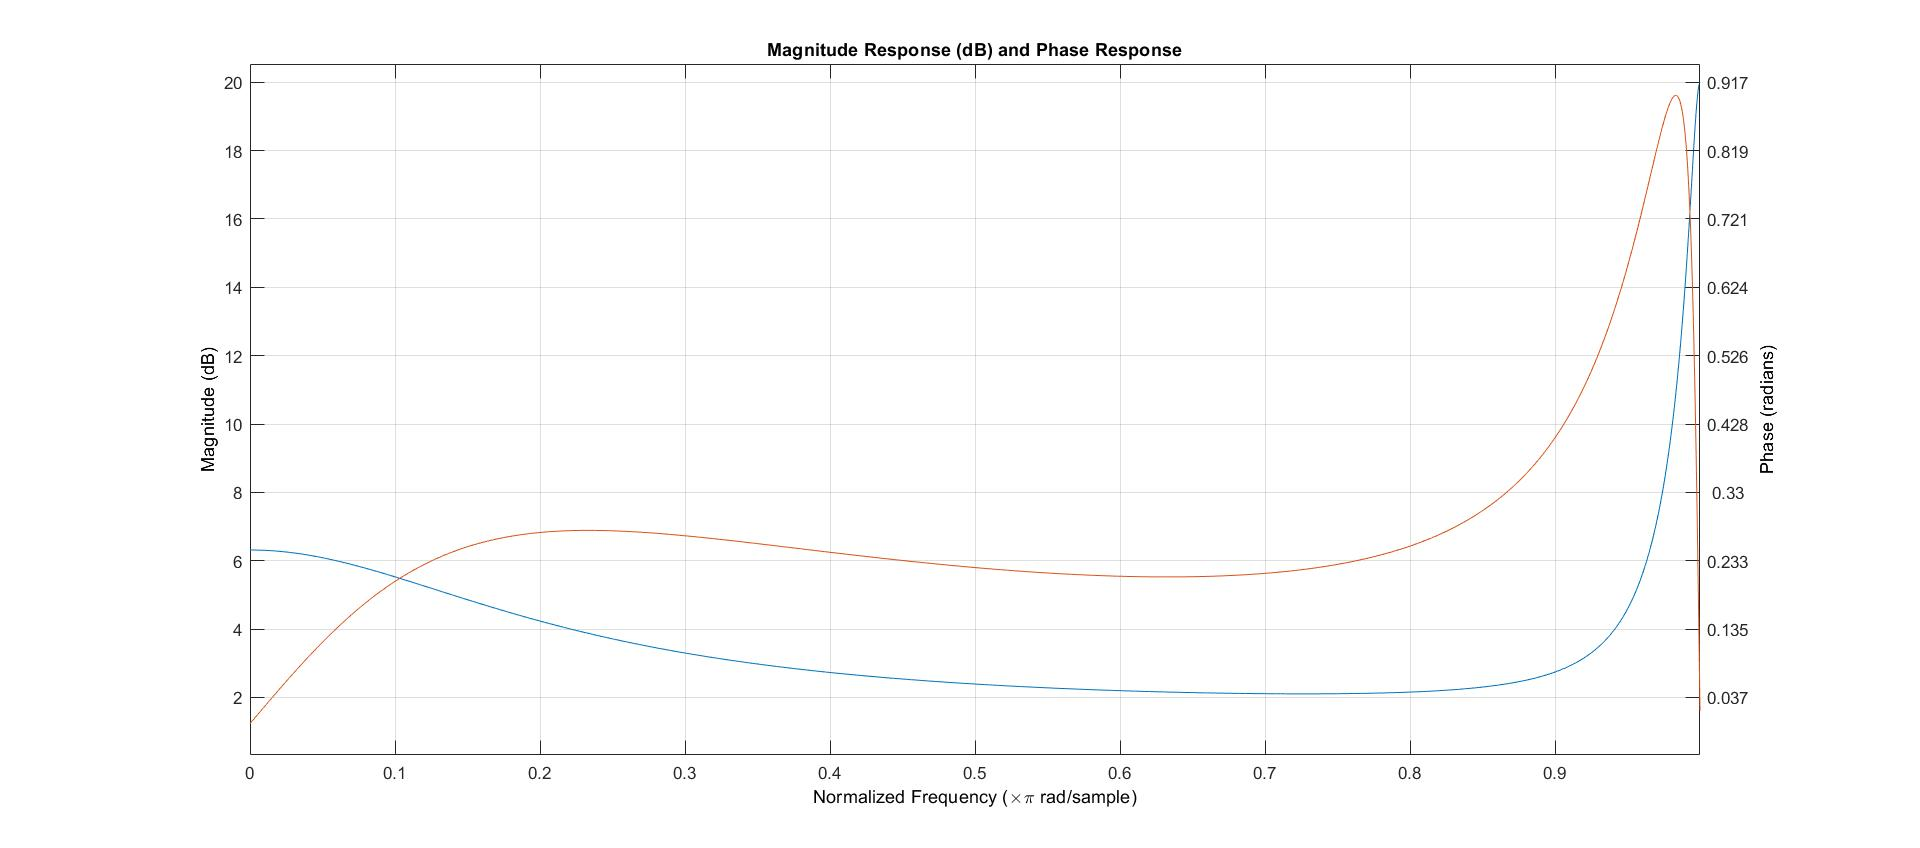

In [ ]:
Image("t13.jpg", width=1000)

**Matlab code**
```
a = [2 -1.5 -3.5];
b = [2 -3.5 -4.5];
fvtool(b,a)
```




#**Problem 14**
For the system with transfer function
$$H(z) = \frac{2z + 4}{2z^3 + 4z^2 + z + 2}$$
a) Calculate difference equation relating the input $x[n]$ to the output $y[n]$  
  
b) Design a block diagram realization (Direct Form I)  
  
c) Plot impulse and frequency responses  
  
Plot impulse and frequency response. Provide Matlab code.

**Solution**
$$\frac{2z + 4}{2z^3 + 4z^2 + z + 2} = \frac{z^{-2} + 2z^{-3}}{1 + 2z^{-1} + 0.5z^{-2} + z^{-3}} = \frac{Y(z)}{X(z)} =  \frac {b_0 + b_1 z^{-1} + b_2z^{-2} + b_3z^{-3}}{a_0 + a_1 z^{-1} + a_2z^{-2}+a_3z^{-3}} \\
y[n] =x[n-2] + 2x[n-3] - 2y[n-1] - 0.5y[n-2] - y[n-3]$$

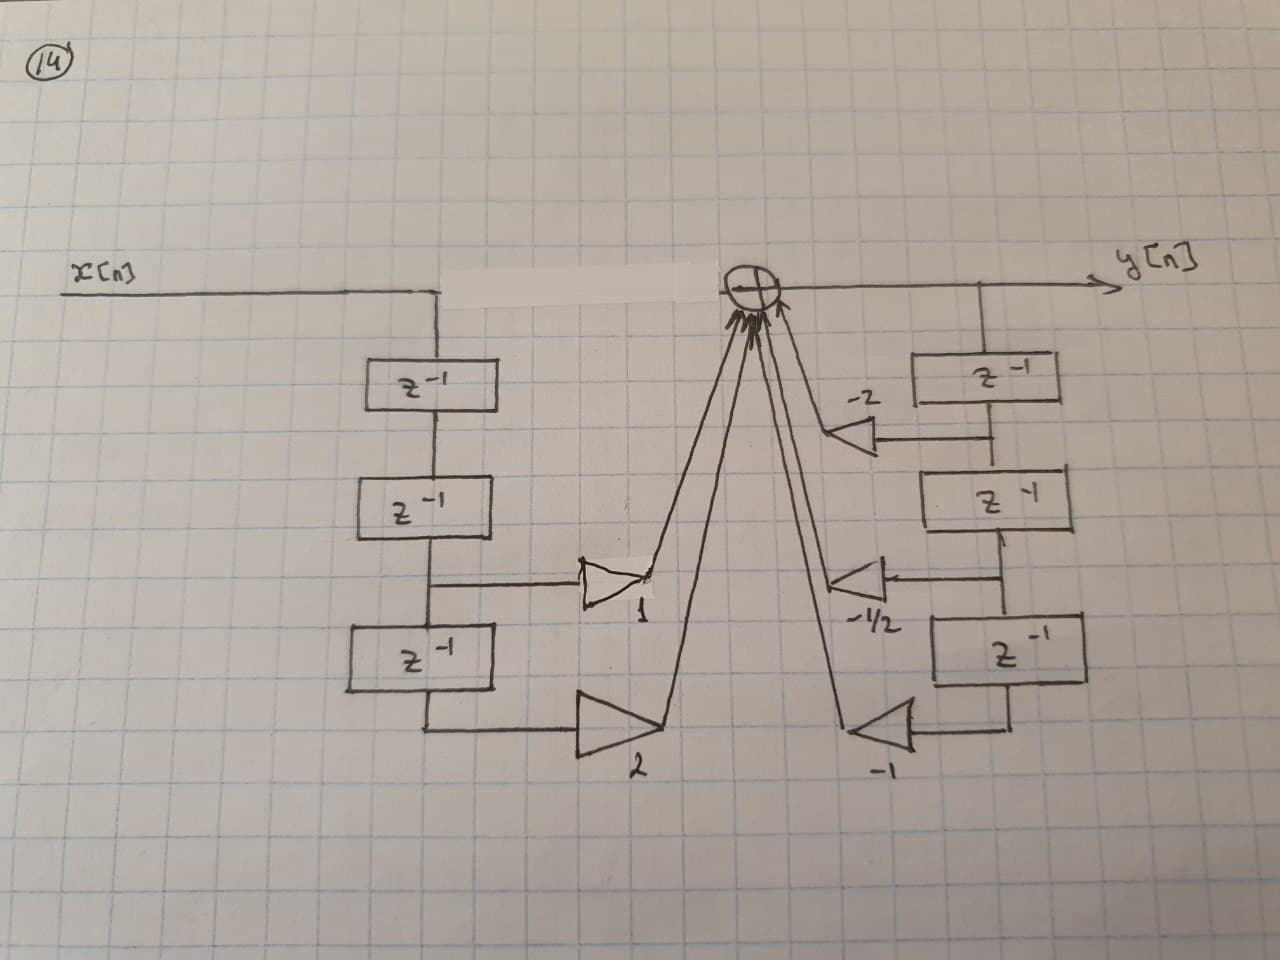

In [ ]:
Image("14_cor.jpg", width=800)

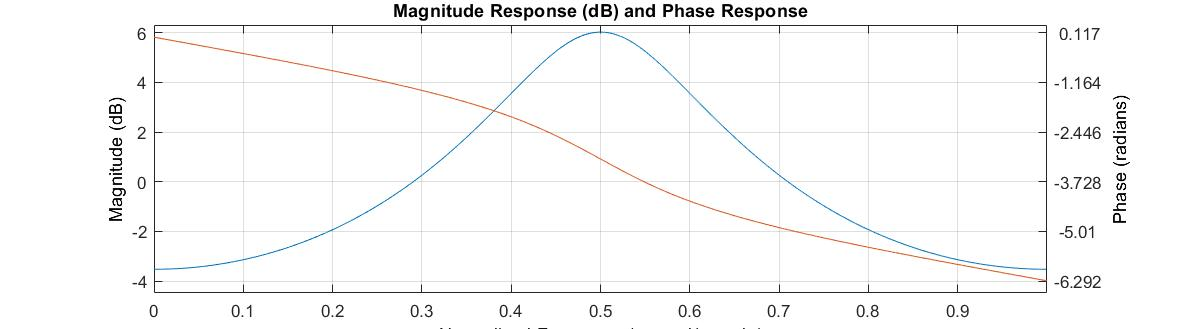

In [ ]:
Image("t14_mp.jpg", width=1000)

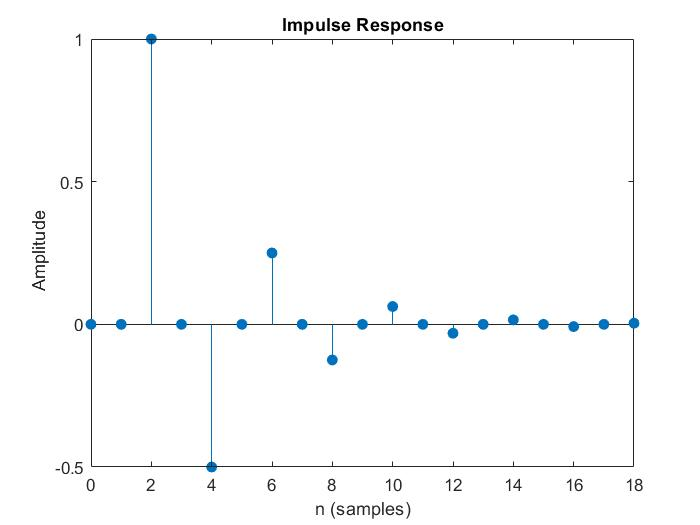

In [ ]:
Image("t14_imp.jpg", width=1000)




```
a = [1 2 0.5 1];
b = [0 0 1 2];
fvtool(b,a)
impz(b, a)
```



**# Problem 15**
In the DAC we want to use a linear interpolation between samples instead of standard Sample and Hold, as shown in the figure below. This is a First Order Hold reconstructor.

![title](15.png)

a) Show that $\large x(t) = \sum\limits_{n = -\infty}^{\infty} x[n]g(t - nT_s)$ , where $g(t)$ is the triangle pulse  
  

**Solution**

$$g(t) * x_s(t) = g(t) * \sum_{n=-\infty}^{\infty}x(nT_s) \delta (t - nT_S) = \sum_{n=-\infty}^{\infty}x(nT_s)g(t-nT_s) $$

source: https://web.stanford.edu/class/ee179/lectures/notes11.pdf